## Problem Statement: 
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

### Objective: With detailed analysis of given data, we will answer two questions: 
1. What attributes of clients give us an idea that he/she may experience difficulties with making payments, if loan is approved? - Findings/Insights from application data
2. What are the conditions in which previous loan application has been rejected or approved? - Findings/Insights from previous_application data

### Loading Necessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install plotly cufflinks

You should consider upgrading via the 'c:\users\addicted\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [3]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#some plotly library modules
from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly
from plotly import tools
from plotly.subplots import make_subplots #to add sublots
import plotly.express as px
init_notebook_mode(connected=True)

#to use plotly with pandas
import cufflinks    # For iplot etc
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

pd.set_option('display.max_columns', 80)  # Change to higher value(150~) during analysis
pd.set_option('display.max_rows', 40)  # Change to higher value(80~) during analysis

In [4]:
# for aesthetic reasons
plt.style.use('ggplot')
sns.set_style('whitegrid')
green = '#009473'
red = '#dd4124'
blue = '#3780BF'
orange = '#FF9933'

## Part 1: Analysing Application Data 

### Loading Application Data & Overviewing

In [5]:
# Reading application_data csv to app_df variable
app_df = pd.read_csv('application_data.csv')

In [6]:
app_df.head(8)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   
6      100009       0         Cash loans           F            Y   
7      100010       0         Cash loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   
5               Y             0           99000.0    490495.5      27517.5   
6               Y             1          171000.0   1560726.0      41301.0   
7               Y             0          360000.0   1530000.0      42075.0   

   AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0         351000.0    Unaccompanied               Working   
1        1129500.0           Family         State servant   
2         135000.0    Unaccompanied               Working   
3         297000.0    Unaccompanied               Working   
4         513000.0    Unaccompanied               Working   
5         454500.0  Spouse, partner         State servant   
6        1395000.0    Unaccompanied  Commercial associate   
7        1530000.0    Unaccompanied         State servant   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special               Married  House / apartment   
6               Higher education               Married  House / apartment   
7               Higher education               Married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   
5                    0.035792      -16941          -1588            -4970.0   
6                    0.035792      -13778          -3130            -1213.0   
7                    0.003122      -18850           -449            -4597.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   
5             -477          NaN           1               1                1   
6             -619         17.0           1               1                0   
7            -2379          8.0           1               1                1   

 

In [7]:
# checking shape
app_df.shape

(307511, 122)

In [8]:
app_df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [9]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


### Checking Missing Values percentage in application data

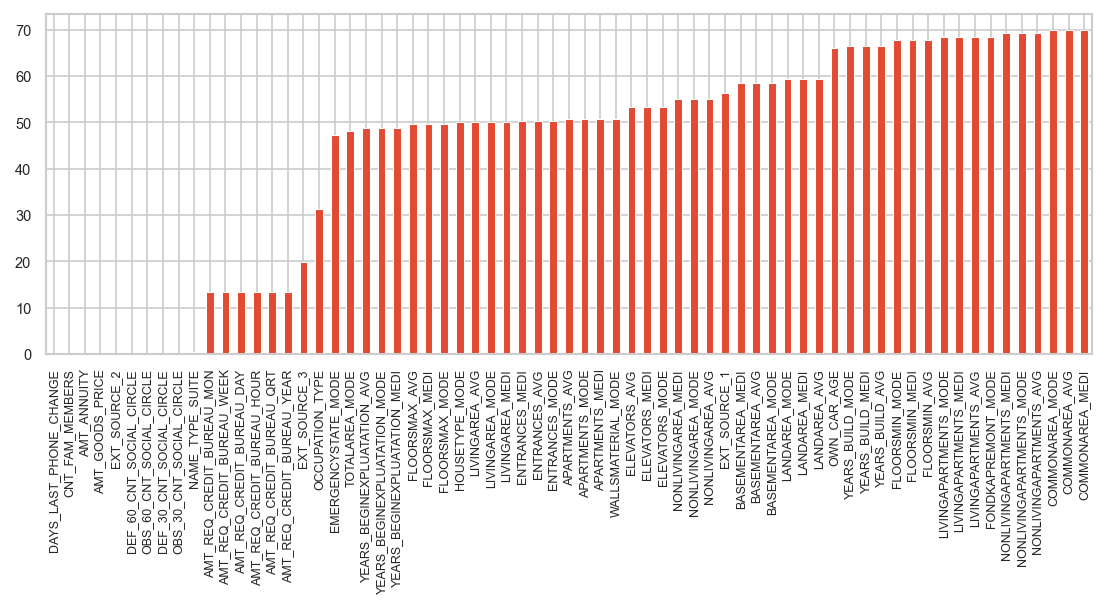

Total Columns with null data: 67


In [10]:
#plotting a bar graph to view the percentage of Missing Values in the application data
null_data = app_df.isnull().sum()
null_data = 100*(null_data/app_df.shape[0]) #getting percentage 
null_data = null_data[null_data>0]
null_data.sort_values(inplace=True)
plt.figure(figsize=[9,3],dpi=150)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=7)

null_data.plot.bar()
plt.show()

print('Total Columns with null data:',len(null_data))

In [11]:
#subsetting columns from app_df which have more than 35% missing rows
hnull_data = app_df.isnull().sum()
hnull_data = hnull_data.apply(lambda x: (x/app_df.shape[0])*100) #getting percentage
hnull_data = hnull_data[hnull_data>35]
hnull_data.sort_values(ascending=False,inplace=True)
print(len(hnull_data), 'Columns with High missing Data')
hnull_data

49 Columns with High missing Data


COMMONAREA_AVG                  69.872297
COMMONAREA_MEDI                 69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
                                  ...    
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
Length: 49, dtype: float64

- So there are `67 column` with null values & `49 columns` have above null values above 35%. We will drop these 49 columns.

In [12]:
# Function to remove columns having null values above 35%
def removeHNulls(dataframe,percent=0.35):
    '''
    Returns a pandas dataframe removing columns with null values above cutoff range.
    
    Input Parameters:
    ----------
    dataframe
    percent: cutoff percentage; default to 0.35  i.e 35%
    '''
    df = dataframe.copy()
    in_shape = df.shape
    colnames = (df.isnull().sum()/len(df))
    colnames = list(colnames[colnames.values>=percent].index)
    df.drop(labels = colnames,axis =1,inplace=True)        
    print("Number of Columns dropped: ",len(colnames))    
    print("\nOld dataset Shape:",in_shape,"\nNew dataset Shape:",df.shape)
    return df

In [13]:
app_df = removeHNulls(app_df,0.35)

Number of Columns dropped:  49

Old dataset Shape: (307511, 122) 
New dataset Shape: (307511, 73)


In [14]:
# Checking percentage of null values in remaining columns of app_df
app_df.isnull().sum()/len(app_df)*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 73, dtype: float64

- As we have removed all columns with more than 35% null values, remaining columns have low null values.
- Columns having very low values can be imputed with mean, median etc in later stage.

## Data Cleaning and Imputing Missing Values in Application Data

In [15]:
#### Let's Check different DataTypes in app_df
app_df.dtypes.value_counts()

int64      41
float64    20
object     12
dtype: int64

- So there are `41 int` type column, `20 float` type column, `12 object` type columns.
- We will start with Object type columns first

### Handling Object type columns

In [16]:
#subsetting object type columns in obj_col dataframe 
obj_col = app_df.dtypes[app_df.dtypes==np.object]
app_df[obj_col.index]

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0              Cash loans           M            N               Y   
1              Cash loans           F            N               N   
2         Revolving loans           M            Y               Y   
3              Cash loans           F            N               Y   
4              Cash loans           M            N               Y   
...                   ...         ...          ...             ...   
307506         Cash loans           M            N               N   
307507         Cash loans           F            N               Y   
307508         Cash loans           F            N               Y   
307509         Cash loans           F            N               Y   
307510         Cash loans           F            N               N   

       NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        Unaccompanied               Working  Secondary / secondary special   
1               Family         State servant               Higher education   
2        Unaccompanied               Working  Secondary / secondary special   
3        Unaccompanied               Working  Secondary / secondary special   
4        Unaccompanied               Working  Secondary / secondary special   
...                ...                   ...                            ...   
307506   Unaccompanied               Working  Secondary / secondary special   
307507   Unaccompanied             Pensioner  Secondary / secondary special   
307508   Unaccompanied               Working               Higher education   
307509   Unaccompanied  Commercial associate  Secondary / secondary special   
307510   Unaccompanied  Commercial associate               Higher education   

          NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
0       Single / not married  House / apartment        Laborers   
1                    Married  House / apartment      Core staff   
2       Single / not married  House / apartment        Laborers   
3             Civil marriage  House / apartment        Laborers   
4       Single / not married  House / apartment      Core staff   
...                      ...                ...             ...   
307506             Separated       With parents     Sales staff   
307507                 Widow  House / apartment             NaN   
307508             Separated  House / apartment        Managers   
307509               Married  House / apartment        Laborers   
307510               Married  House / apartment        Laborers   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE  
0                       WEDNESDAY  Business Entity Type 3  
1                          MONDAY                  School  
2                          MONDAY              Government  
3                       WEDNESDAY  Business Entity Type 3  
4                        THURSDAY                Religion  
...                           ...                     ...  
307506                   THURSDAY                Services  
307507                     MONDAY                     XNA  
307508                   THURSDAY                  School  
307509                  WEDNESDAY  Business Entity Type 1  
307510                   THURSDAY  Business Entity Type 3  

[307511 rows x 12 columns]

In [17]:
#defining a function to print count of all unique values in app_df and obj_col dataframes
def print_value_count(df,col):
    for i in col:
        print(i,':\n',df[i].value_counts(dropna=False),sep='',end='\n--------------------------\n\n')

In [18]:
print_value_count(app_df,obj_col.index)

NAME_CONTRACT_TYPE:
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
--------------------------

CODE_GENDER:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
--------------------------

FLAG_OWN_CAR:
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
--------------------------

FLAG_OWN_REALTY:
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
--------------------------

NAME_TYPE_SUITE:
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
--------------------------

NAME_INCOME_TYPE:
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave   

#### Observations: 
1. `CODE_GENDER` has 4 `XNA` values.
2. `NAME_TYPE_SUITE` has 1292 `NaN` values.
3. `NAME_FAMILY_STATUS` has 2 `Unknown` values.
4. `OCCUPATION_TYPE` has 96391 `NaN` values which is approximately 31%.
5. `ORGANIZATION_TYPE` has 55374 `XNA` values.

**Next Steps**: We will perform value imputation on these categorical columns one at a time. Post which we will use them for analysis of correlation with "Target Variable" and derive business insights. 

#### Handling missing values of CODE_GENDER column: 

- This column specifies Gender of the client

In [19]:
app_df.loc[app_df.CODE_GENDER == 'XNA','CODE_GENDER'] = app_df['CODE_GENDER'].mode()[0]
app_df.CODE_GENDER.value_counts(dropna=False)

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

#### Handling missing values of NAME_TYPE_SUITE column: 

- This column specifies that the client was accompanied by whom, when came to apply for loan.
- Being a categorical variable with only 1292 `NaN` values, we will replace it with `mode`.

In [20]:
#converting NAME_TYPE_SUITE column to string data type from object type
app_df['NAME_TYPE_SUITE'] = app_df['NAME_TYPE_SUITE'].astype('str')
#finding the mode value of NAME_TYPE_SUITE column and imputing rows with "nan" with it 
mode_name_suite = app_df['NAME_TYPE_SUITE'].mode()[0]
app_df.loc[app_df['NAME_TYPE_SUITE']=='nan','NAME_TYPE_SUITE']='Unaccompanied'
app_df['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

#### Handling missing values of NAME_FAMILY_STATUS column: 

- This column specifies that the marital status of the client 
- Being a categorical variable with only 2 "unknown" values, we will drop these two rows as it won't impact our dataset features

In [21]:
#converting NAME_FAMILY_STATUS column to string data type from object type
app_df['NAME_FAMILY_STATUS'] = app_df['NAME_FAMILY_STATUS'].astype('str')
app_df = app_df[~app_df['NAME_FAMILY_STATUS'].isin(['Unknown'])]
app_df['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Name: NAME_FAMILY_STATUS, dtype: int64

#### Handling missing values of OCCUPATION_TYPE column: 

- This column specifies that the type of occupation of the clients.
- This being an important column for analysis and having 96391 `NaN` values, we will not impute it and only replace it with `Data Unavailable`.

In [22]:
#converting OCCUPATION_TYPE column to string data type from object type and replacing "nan" with "Data Unavailable"
app_df['OCCUPATION_TYPE'] = app_df['OCCUPATION_TYPE'].astype('str')
app_df.loc[app_df['OCCUPATION_TYPE']=='nan','OCCUPATION_TYPE']='Data Unavailable'
app_df['OCCUPATION_TYPE'].value_counts()

Data Unavailable         96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21370
Drivers                  18603
High skill tech staff    11380
Accountants               9812
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

#### Handling missing values of `ORGANIZATION_TYPE` column: 

- This column specifies that the type of organization the clients are working in.
- This being an important column for analysis and having approx 53000 `XNA` values, we will not impute it with mode value as it can create a bias in our dataset and affect our findings later.    
- Hence, we will handle these values in following way:
  - Replace `XNA` where NAME_INCOME_TYPE is `Pensioner/Student/Unemployed` to `Not Applicable`.
  - Replace all other rows with `XNA` to `Data Unavailable`, if remaining any.

In [23]:
#converting ORGANIZATION_TYPE column to string data type from object type and replacing XNA values as stated above
app_df['ORGANIZATION_TYPE'] = app_df['ORGANIZATION_TYPE'].astype('str')
organization_index = app_df[(((app_df['NAME_INCOME_TYPE']=='Pensioner')|
                                   (app_df['NAME_INCOME_TYPE']=='Student')|
                                   (app_df['NAME_INCOME_TYPE']=='Unemployed')))].index
organization_index = list(organization_index)
app_df.loc[organization_index,'ORGANIZATION_TYPE'] = 'Not Applicable'
app_df.loc[app_df['ORGANIZATION_TYPE']=='XNA','ORGANIZATION_TYPE']='Data Unavailable'
app_df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67986
Not Applicable            55402
Self-employed             38411
Other                     16682
Medicine                  11190
                          ...  
Religion                     85
Industry: type 13            67
Trade: type 4                64
Trade: type 5                49
Industry: type 8             24
Name: ORGANIZATION_TYPE, Length: 58, dtype: int64

#### Imputing any other columns having `XNA` value with `np.NaN`

In [24]:
# Replacing XNA with NaN
app_df = app_df.replace('XNA',np.NaN)

### Let's Look into Numerical Columns of application data 

In [25]:
#subsetting numerical columns from application dataframe
numerical_col = app_df.dtypes[(app_df.dtypes==np.int64) | (app_df.dtypes==np.float)]
app_df[numerical_col.index]

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0           100002       1             0          202500.0    406597.5   
1           100003       0             0          270000.0   1293502.5   
2           100004       0             0           67500.0    135000.0   
3           100006       0             0          135000.0    312682.5   
4           100007       0             0          121500.0    513000.0   
...            ...     ...           ...               ...         ...   
307506      456251       0             0          157500.0    254700.0   
307507      456252       0             0           72000.0    269550.0   
307508      456253       0             0          153000.0    677664.0   
307509      456254       1             0          171000.0    370107.0   
307510      456255       0             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0           24700.5         351000.0                    0.018801       -9461   
1           35698.5        1129500.0                    0.003541      -16765   
2            6750.0         135000.0                    0.010032      -19046   
3           29686.5         297000.0                    0.008019      -19005   
4           21865.5         513000.0                    0.028663      -19932   
...             ...              ...                         ...         ...   
307506      27558.0         225000.0                    0.032561       -9327   
307507      12001.5         225000.0                    0.025164      -20775   
307508      29979.0         585000.0                    0.005002      -14966   
307509      20205.0         319500.0                    0.005313      -11961   
307510      49117.5         675000.0                    0.046220      -16856   

        DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0                -637            -3648.0            -2120           1   
1               -1188            -1186.0             -291           1   
2                -225            -4260.0            -2531           1   
3               -3039            -9833.0            -2437           1   
4               -3038            -4311.0            -3458           1   
...               ...                ...              ...         ...   
307506           -236            -8456.0            -1982           1   
307507         365243            -4388.0            -4090           1   
307508          -7921            -6737.0            -5150           1   
307509          -4786            -2562.0             -931           1   
307510          -1262            -5128.0             -410           1   

        FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  \
0                    1                0                 1           1   
1                    1                0                 1           1   
2                    1                1                 1           1   
3                    1                0                 1           0   
4                    1                0                 1           0   
...                ...              ...               ...         ...   
307506               1                0                 1           0   
307507               0                0                 1           1   
307508               1                0                 1           0   
307509               1                0                 1           0   
307510               1                1                 1           1   

        FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                0              1.0                     2   
1                0              2.0                     1   
2                0              1.0                     2   
3                0              2.0                     2   
4                0              1.0                     2   
...            ...              ...   

#### Observations: 
1. There are 61 columns with numerical data
2. We can see some column staring with 'Days' have negative values. Those seem invalid and would need to be analysed further before dropping/treating
3. We also need to check possible `NaN` in all columns

#### Dropping Columns with low/unnecessary information
1. There may be some column with 2-3 values, with 1-2 value having really low count. In that case that column will not provide much information for our analysis. We can drop those columns. 
2. Also columns having very high unique columns may not provide any useful info for analysis - We may drop these columns.

In [26]:
#printing count of unique values in all numerical columns of application dataframe 
print_value_count(app_df,numerical_col.index)

SK_ID_CURR:
100401    1
241119    1
245213    1
243164    1
230874    1
         ..
154398    1
148253    1
150300    1
160539    1
100303    1
Name: SK_ID_CURR, Length: 307509, dtype: int64
--------------------------

TARGET:
0    282684
1     24825
Name: TARGET, dtype: int64
--------------------------

CNT_CHILDREN:
0     215369
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
10         2
12         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64
--------------------------

AMT_INCOME_TOTAL:
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
83479.5         1
44955.0         1
78916.5         1
37008.0         1
131125.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64
--------------------------

AMT_CREDIT:
450000.0     9709
675000.0     8876
225000.0     8162
180000.0     7342
270000.0     7241
             ... 
859581.0 

FLAG_DOCUMENT_17:
0    307427
1        82
Name: FLAG_DOCUMENT_17, dtype: int64
--------------------------

FLAG_DOCUMENT_18:
0    305009
1      2500
Name: FLAG_DOCUMENT_18, dtype: int64
--------------------------

FLAG_DOCUMENT_19:
0    307326
1       183
Name: FLAG_DOCUMENT_19, dtype: int64
--------------------------

FLAG_DOCUMENT_20:
0    307353
1       156
Name: FLAG_DOCUMENT_20, dtype: int64
--------------------------

FLAG_DOCUMENT_21:
0    307406
1       103
Name: FLAG_DOCUMENT_21, dtype: int64
--------------------------

AMT_REQ_CREDIT_BUREAU_HOUR:
0.0    264365
NaN     41518
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
--------------------------

AMT_REQ_CREDIT_BUREAU_DAY:
0.0    264502
NaN     41518
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
--------------------------

AMT_REQ_CREDIT_BUREAU_WEEK:
0.0    25

In [27]:
# We will remove unnecessary columns from the application dataset 
# Retaining only columns with relevant information for further analysis
drop_columns=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

app_df.drop(labels=drop_columns,axis=1,inplace=True)

#### DAYS_ Column Treatment - These columns have negative values and can't be dropped from analysis, keeping in mind important information contained in these columns

In [28]:
# DAYS columns
days_col = [col for col in app_df if col.startswith('DAYS')]
days_col

['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

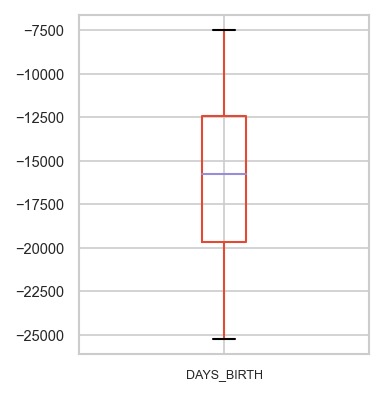

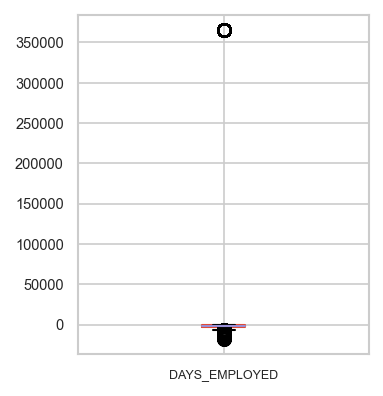

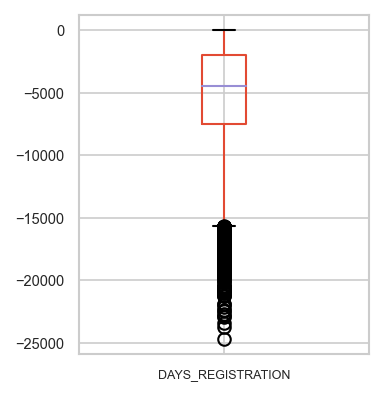

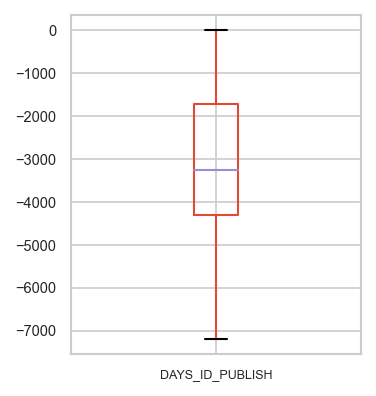

In [29]:
#plotting boxplots for above listed "Days" column using a loop
for column in days_col:
    plt.figure(figsize=[2.5,3],dpi=150)
    app_df.boxplot([column])

#### We can take absolute value & impute it in those columns

In [30]:
# Negative value treatment
app_df[days_col]= abs(app_df[days_col])

In [31]:
# Converting 'DAYS_BIRTH' to years
app_df['AGE']= (app_df['DAYS_BIRTH']/365).astype(int)
app_df.drop(labels = 'DAYS_BIRTH',axis =1,inplace=True)
app_df['AGE'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [32]:
# Bining 'DAYS_BIRTH'
app_df['AGE_BIN']=pd.cut(app_df['AGE'], bins=[19,25,35,60,100], labels=['Very_Young','Young', 'Middle_Age', 'Senior_Citizen'])
app_df.AGE_BIN.value_counts()

Middle_Age        185900
Young              75923
Senior_Citizen     29368
Very_Young         16318
Name: AGE_BIN, dtype: int64

#### Imputing some AMT_REQ_CREDIT_BUREAU_  columns having NaN valus with their respective mode


- We can impute the missing values of columns `AMT_REQ_CREDIT_BUREAU_YEAR, AMT_REQ_CREDIT_BUREAU_MONTH, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_QRT` with the mode of those columns.
- These columns are number of credit inquiries, replacing missing values with the most frequent value can be a useful approach.

In [33]:
amt_columns = [col for col in app_df if col.startswith('AMT_REQ_CREDIT_BUREAU')]
for i in amt_columns:
    app_df[i].fillna(app_df[i].mode()[0], inplace=True)

#### Binning some variables - `AMT_INCOME_BIN` and `AMT_CREDIT_BIN`

In [34]:
# Binning 'AMT_INCOME_RANGE' based on quantiles
app_df['AMT_INCOME_BIN'] = pd.qcut(app_df.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app_df['AMT_INCOME_BIN'].head(10)

# Creating bins for income amount
#bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
#slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       #'200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       #'375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

#app_df['AMT_INCOME_BIN']=pd.cut(app_df['AMT_INCOME_TOTAL'],bins,labels=slot)

0       MEDIUM
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5     VERY_LOW
6       MEDIUM
7    VERY_HIGH
8          LOW
9          LOW
Name: AMT_INCOME_BIN, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [35]:
# Binning 'AMT_CREDIT_RANGE' by creating various ranges
app_df['AMT_CREDIT_BIN'] = pd.qcut(app_df.AMT_CREDIT, q=[0, 0.2, 0.5, 0.8, 0.97, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app_df['AMT_CREDIT_BIN'].head(10)

0          LOW
1         HIGH
2     VERY_LOW
3          LOW
4          LOW
5          LOW
6    VERY_HIGH
7         HIGH
8         HIGH
9          LOW
Name: AMT_CREDIT_BIN, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

## Outlier Analysis in Application Data

### Distribution for Numerical Columns

In [36]:
# select numeric type columns - numpy number
num_cols = app_df.select_dtypes(include=np.number)
# check selected columns with the .columns attribute
num_cols.columns
num_cols.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0      100002       1             0          202500.0    406597.5   
1      100003       0             0          270000.0   1293502.5   
2      100004       0             0           67500.0    135000.0   
3      100006       0             0          135000.0    312682.5   
4      100007       0             0          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  \
0      24700.5         351000.0                    0.018801            637   
1      35698.5        1129500.0                    0.003541           1188   
2       6750.0         135000.0                    0.010032            225   
3      29686.5         297000.0                    0.008019           3039   
4      21865.5         513000.0                    0.028663           3038   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  HOUR_APPR_PROCESS_START  \
0             3648.0             2120                       10   
1             1186.0              291                       11   
2             4260.0             2531                        9   
3             9833.0             2437                       17   
4             4311.0             3458                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  \
0                            0                       0   
1                            0                       0   
2                            0                       0   
3                            0                       0   
4                            0                       0   

   REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  EXT_SOURCE_2  \
0                       0                        0      0.262949   
1                       0                        0      0.622246   
2                       0                        0      0.555912   
3                       0                        0      0.650442   
4                       1                        1      0.322738   

   EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0      0.139376                       2.0                       2.0   
1           NaN                       1.0                       0.0   
2      0.729567                       0.0                       0.0   
3           NaN                       2.0                       0.0   
4           NaN                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       2.0                       0.0   
4                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE  
0                        0.0             

In [37]:
# removing few columns since we'll analyse them separately
rem = ['AMT_INCOME_TOTAL', 'AGE', 'DAYS_EMPLOYED', 'AMT_ANNUITY', 'DAYS_REGISTRATION']
for i in rem:
    num_cols.drop(labels =i, axis =1,inplace=True)

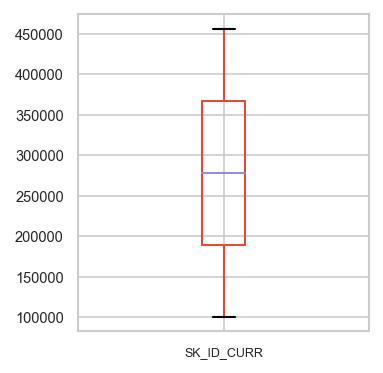

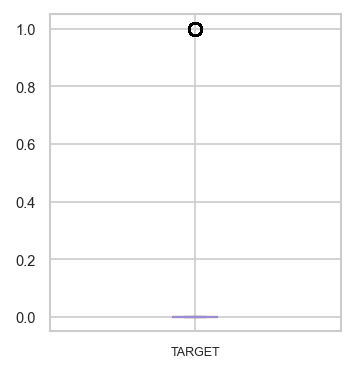

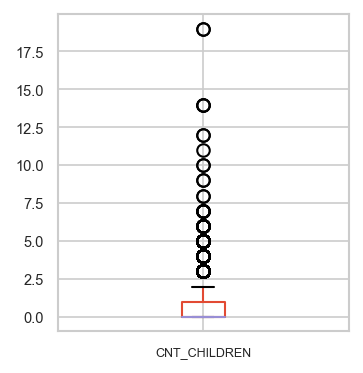

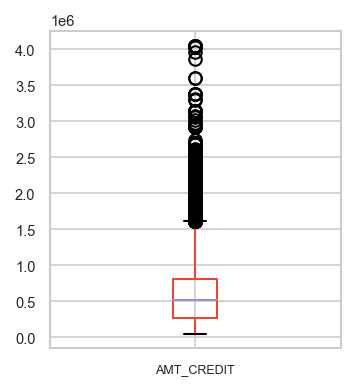

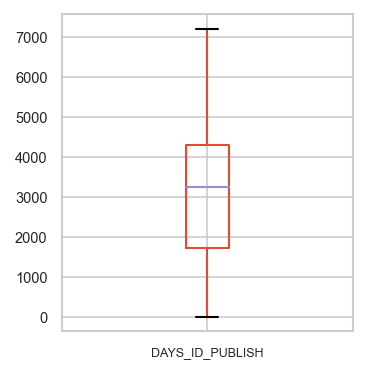

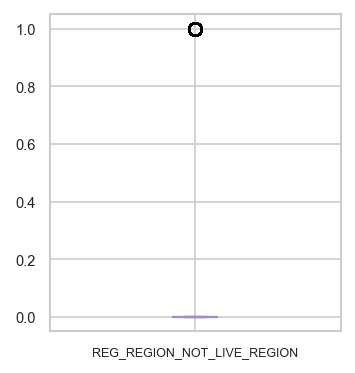

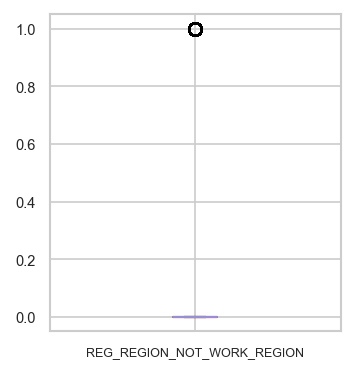

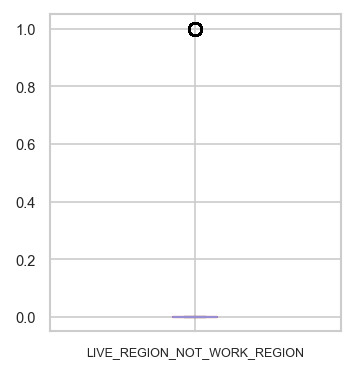

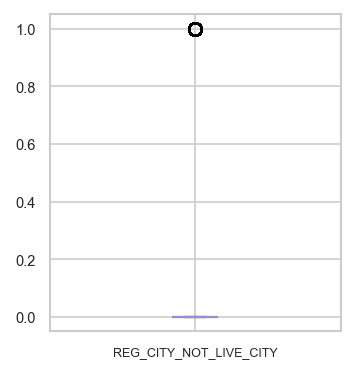

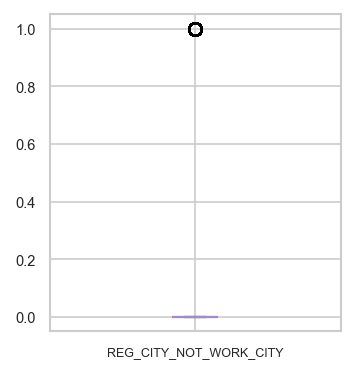

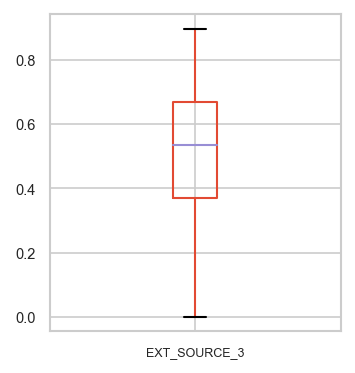

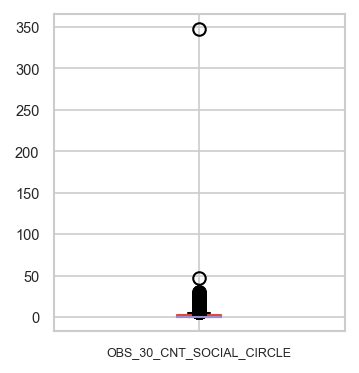

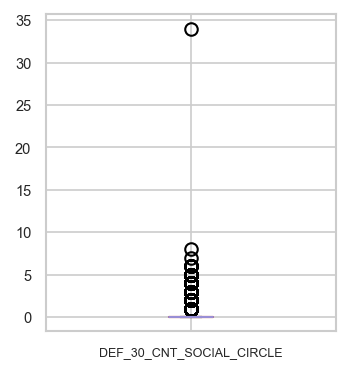

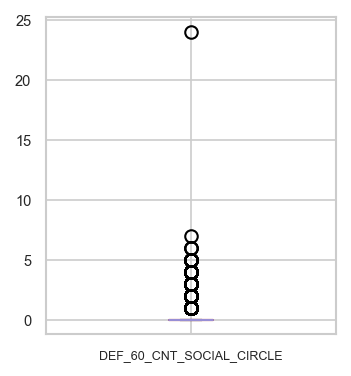

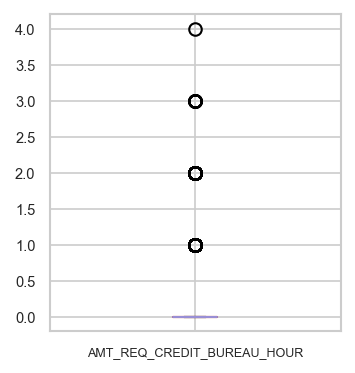

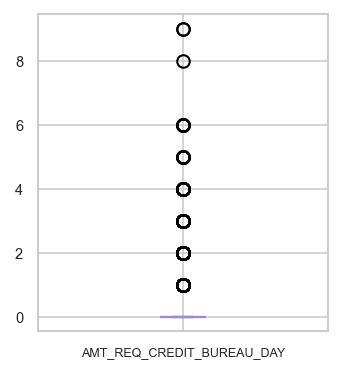

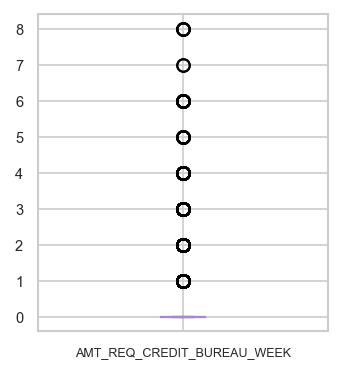

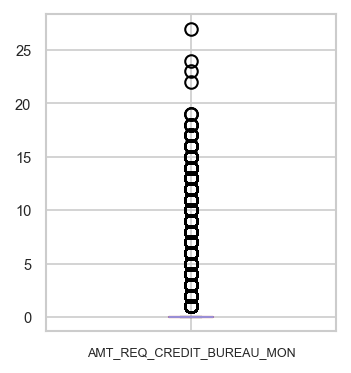

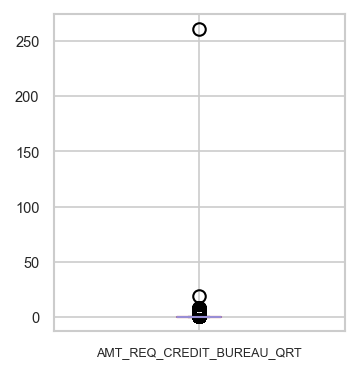

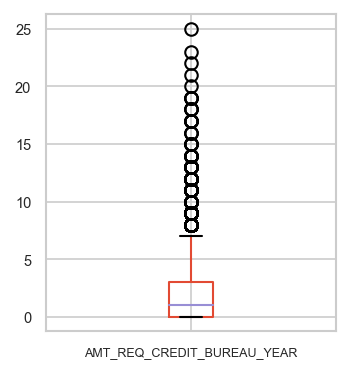

In [38]:
#Plotting box-plot for all numerical columns from num_cols dataframe 
for column in num_cols:
    plt.figure(figsize=[2.5,2.8],dpi=150)
    app_df.boxplot([column])

#### Few Observations from Box-Plots: 

1. `SK_ID_CURR` has unique values for all customers.
1. `TARGET` columns shows boxplot at 0, that means most values are at 0 while relatively less at 1. 
1. `CNT_CHILDREN` - Outliers are present specifying some clients have as many as 10 children and even more.
1. `AMT_CREDIT` - Outliers are present 
1. `AMT_GOOD_PRICE` - Outliers are present 

#### Outlier in AMT_INCOME_TOTAL range

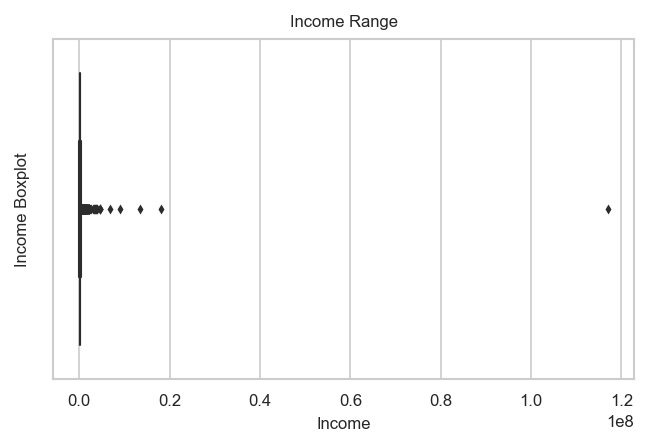

max value is: 117000000.0
count    3.075090e+05
mean     1.687969e+05
std      2.371234e+05
min      2.565000e+04
0%       2.565000e+04
20%      9.900000e+04
50%      1.471500e+05
75%      2.025000e+05
95%      3.375000e+05
99%      4.725000e+05
100%     1.170000e+08
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64


In [39]:
#### Outlier in Total Income column
fig = plt.figure(figsize=(5,3),dpi=150)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)


box_income = sns.boxplot(data=app_df, x='AMT_INCOME_TOTAL', orient='h',fliersize=2,linewidth=1,color=green)
box_income.set_title('Income Range', fontsize=8)
box_income.set_ylabel('Income Boxplot',fontsize=8)
box_income.set_xlabel('Income',fontsize=8)


plt.show()
print('max value is:',np.quantile(app_df.AMT_INCOME_TOTAL,1))
print(app_df.AMT_INCOME_TOTAL.describe(percentiles=[0,0.2,0.5,0.75,0.95,0.99,1]))

- From above we can clearly say that there are some outliers in very high income range. Max value is 117000000 which is way higher than even 99% quantile.

#### Outlier in AGE range

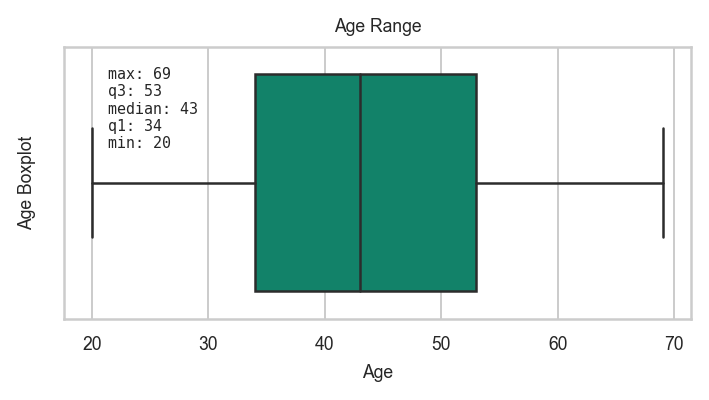

In [40]:

fig = plt.figure(figsize=(4.5,2),dpi=180)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)


box_income = sns.boxplot(data=app_df, x='AGE', orient='h',fliersize=2,linewidth=1,color=green)
box_income.set_title('Age Range', fontsize=7)
box_income.set_ylabel('Age Boxplot',fontsize=7)
box_income.set_xlabel('Age',fontsize=7)

age_quantile = np.quantile(app_df.AGE,[0,0.25,0.5,0.75,1])

fig.text(0.18,0.55,
'''
max: {4}
q3: {3}
median: {2}
q1: {1}
min: {0}
'''.format(int(age_quantile[0]),int(age_quantile[1]),int(age_quantile[2]),int(age_quantile[3]),int(age_quantile[4])),
         fontfamily='monospace',fontsize=6)
plt.show()

- We don't see any outlier in `AGE` column after imputation.

#### Outlier in Days Employed Column

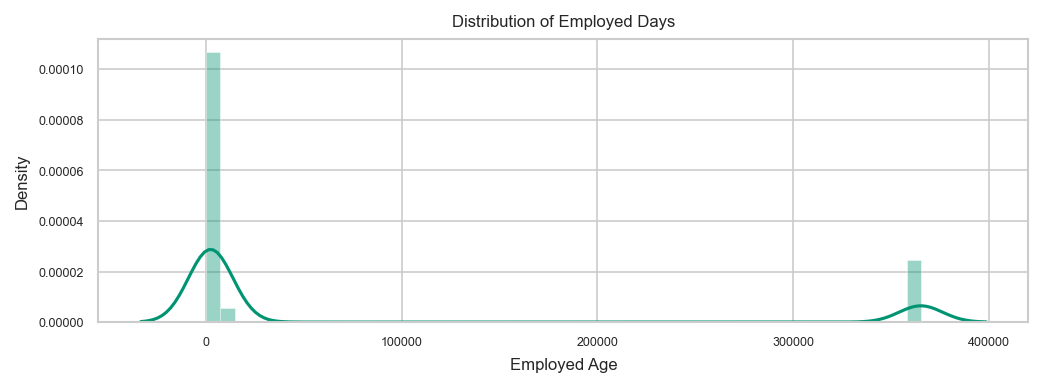

In [41]:
# distribution of 'DAYS_EMPLOYED'
fig = plt.figure(figsize=(8,2.5),dpi=150)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)

dist_employed = sns.distplot(app_df['DAYS_EMPLOYED'], color=green )
dist_employed.set_title('Distribution of Employed Days',fontsize=8)
dist_employed.set_ylabel('Density',fontsize=8)
dist_employed.set_xlabel('Employed Age',fontsize=8)
plt.show()

- There are some entries > 300000. Those seems to be outliers because 300000 days equal to 821 year, that's humanly impossible. Also we have seen max age is 69 in previous Age Boxplot. One can't be employed more than his age.

#### Outlier in AMT_ANNUITY

In [42]:
fig = plt.figure(figsize=(8,2),dpi=180)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)


box_annuity = sns.boxplot(data=app_df, x='AMT_ANNUITY', orient='h',fliersize=2,linewidth=1,color=green)
box_annuity.set_title('Annuity Amount', fontsize=7)
box_annuity.set_ylabel('Annuity Amount Boxplot',fontsize=7)
box_annuity.set_xlabel('Amount',fontsize=7)



fig.text(0.13,0.85,
'''
There seems to be many outliers. Max value
is {0}, i.e way higher than distribution
'''.format(round(app_df['AMT_ANNUITY'].describe()[7])),
         fontfamily='monospace',fontsize=6)
fig.text(0.75,0.35,
'''
Outliers
''', fontfamily='monospace',fontsize=6)

plt.show()

- Loan annuity of 258026 seems too large if we compare with the data distribution. It may be an outlier.

#### Outlier in DAYS_REGISTRATION

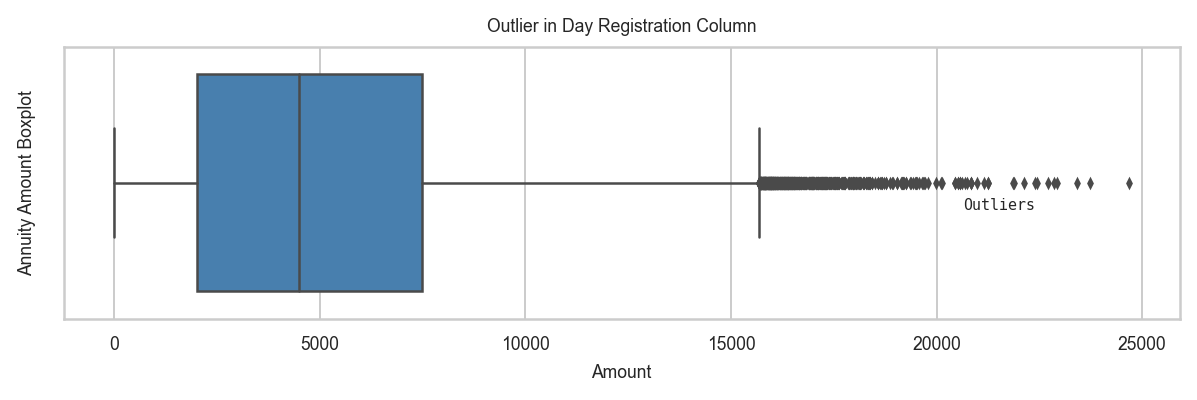

In [43]:
fig = plt.figure(figsize=(8,2),dpi=180)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)


box_annuity = sns.boxplot(data=app_df, x='DAYS_REGISTRATION', orient='h',fliersize=2,linewidth=1,color=blue)
box_annuity.set_title('Outlier in Day Registration Column', fontsize=7)
box_annuity.set_ylabel('Annuity Amount Boxplot',fontsize=7)
box_annuity.set_xlabel('Amount',fontsize=7)



fig.text(0.75,0.38,
'''
Outliers
''',fontfamily='monospace',fontsize=6)

plt.show()

- There are outliers.

### Data distribution in different Categorical columns

In [44]:
# select object type columns - numpy object
cat_cols = app_df.select_dtypes(include=np.object)
# check selected columns with the .columns attribute
cat_cols.columns
cat_cols.head()

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY NAME_TYPE_SUITE  \
0         Cash loans           M            N               Y   Unaccompanied   
1         Cash loans           F            N               N          Family   
2    Revolving loans           M            Y               Y   Unaccompanied   
3         Cash loans           F            N               Y   Unaccompanied   
4         Cash loans           M            N               Y   Unaccompanied   

  NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0          Working  Secondary / secondary special  Single / not married   
1    State servant               Higher education               Married   
2          Working  Secondary / secondary special  Single / not married   
3          Working  Secondary / secondary special        Civil marriage   
4          Working  Secondary / secondary special  Single / not married   

   NAME_HOUSING_TYPE OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0  House / apartment        Laborers                  WEDNESDAY   
1  House / apartment      Core staff                     MONDAY   
2  House / apartment        Laborers                     MONDAY   
3  House / apartment        Laborers                  WEDNESDAY   
4  House / apartment      Core staff                   THURSDAY   

        ORGANIZATION_TYPE  
0  Business Entity Type 3  
1                  School  
2              Government  
3  Business Entity Type 3  
4                Religion

#### Plotting all categorical column except 'ORGANIZATION_TYPE' & 'OCCUPATION_TYPE'

In [45]:
#Plotting the distribution for all categorical variables in application dataframe 

# 'ORGANIZATION_TYPE', 'OCCUPATION_TYPE' have lot of unique values. So we'll plot them separately.
cat_1 = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'WEEKDAY_APPR_PROCESS_START']

a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter

fig = plt.figure(figsize=(16,30), dpi = 100)
plt.rc('xtick', labelsize=11)
plt.rc('ytick', labelsize=12)

for i in cat_1:
    plt.subplot(a, b, c)
    plt.xlabel(i)
    sns.countplot(cat_cols[i])
    plt.xticks(rotation = 90)
    c = c + 1

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.8)
plt.show()

#### Distribution on Occupation Type

In [46]:
####Occupation Type distribution
fig = plt.figure(figsize=(8,3),dpi=180)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)

occ_val = app_df['OCCUPATION_TYPE'].value_counts()
    
dist_occupation = sns.barplot(x=occ_val.index,y=occ_val, color=blue)
dist_occupation.set_title('Distribution of Occupation',fontsize=8)
dist_occupation.set_ylabel('No of People',fontsize=8)
dist_occupation.set_xlabel('Occupations',fontsize=8)
plt.xticks(rotation = 90)

fig.text(0.37,0.7,
'''
There was lot of Unavailable data, Not Applicable for Occupation field,
If we ignore that, Next highest is Laborers
''',
         fontfamily='monospace',fontsize=7)

plt.show()

- Previously, we have imputed `Not Applicable` & `Data Unavailable` with `NaN` values as per industry practice since lot of data was missing. Not taking those into consideration, Laborers, Sales staff, Core staff would make majority of constitution in occupation field.

#### Organization Type distribution

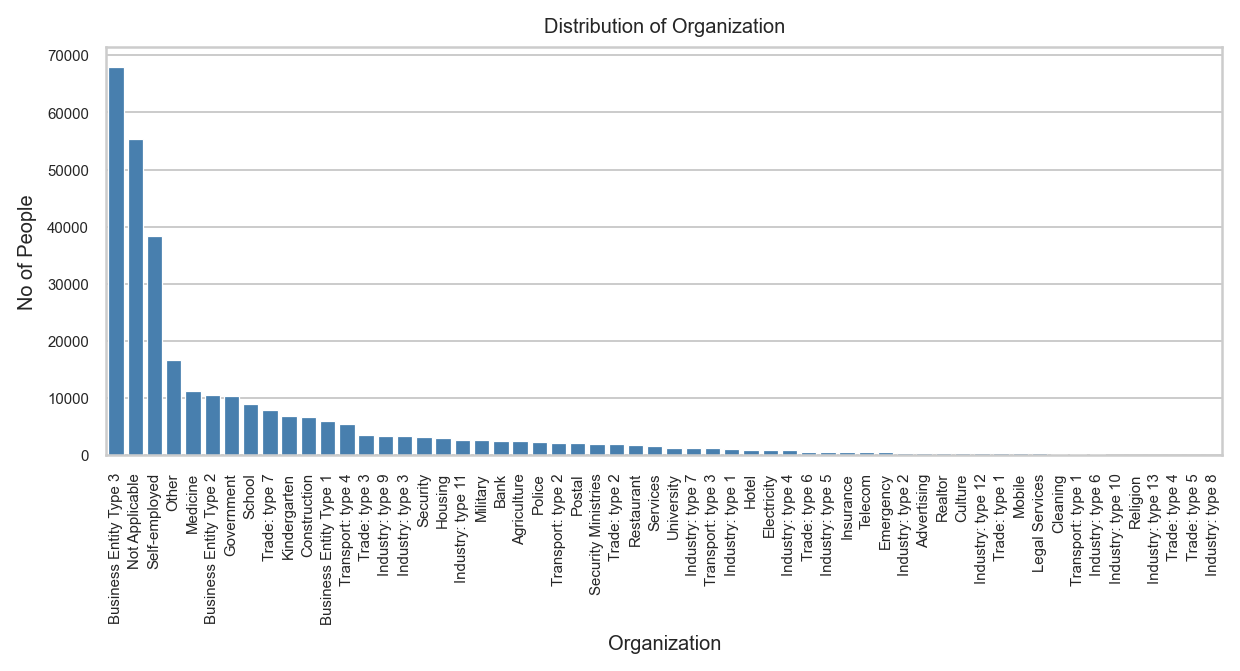

In [47]:
fig = plt.figure(figsize=(8,3),dpi=180)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)

org_val = app_df['ORGANIZATION_TYPE'].value_counts()
    
dist_occupation = sns.barplot(x=org_val.index,y=org_val, color=blue)
dist_occupation.set_title('Distribution of Organization',fontsize=8)
dist_occupation.set_ylabel('No of People',fontsize=8)
dist_occupation.set_xlabel('Organization',fontsize=8)
plt.xticks(rotation = 90)

plt.show()

- We can see that `Business Entity Type 3` has highest loan application. Next to is Not Applicable i.e mostly `Pensoners` who didn't fill this field & we have imputed this field as `Not Applicable`.

## Checking Data Imbalance based on Distribution of TARGET Variable


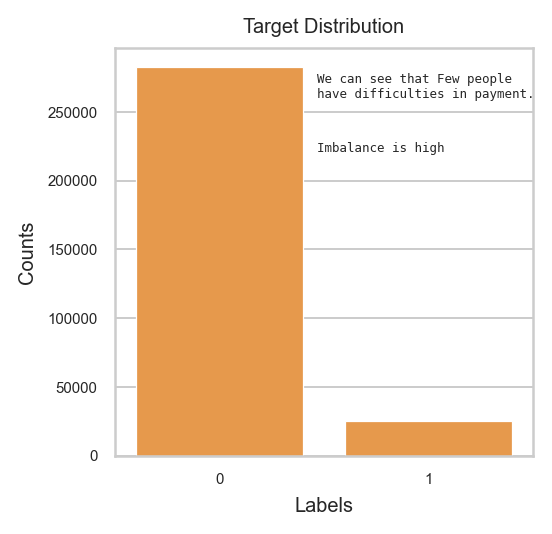

In [48]:
#plotting distribution of TARGET variable - 0 & 1

target_val = app_df["TARGET"].value_counts()

fig = plt.figure(figsize=(3,3),dpi=180)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)
   
dist_occupation = sns.barplot(x=target_val.index,y=target_val, color=orange)
dist_occupation.set_title('Target Distribution',fontsize=8)
dist_occupation.set_ylabel('Counts',fontsize=8)
dist_occupation.set_xlabel('Labels',fontsize=8)
plt.xticks(rotation = 0)

fig.text(0.5,0.76,
'''
We can see that Few people
have difficulties in payment.
''',fontfamily='monospace',fontsize=5)

fig.text(0.5,0.66,
'''
Imbalance is high
''',
         fontfamily='monospace',fontsize=5)
plt.show()

- We can see that few people have difficulties in payment. If we look into ratio, it'll be close to 11:1. For further univariate & bi-variate analysis, we'll separate them.

#### Dividing Data based on Target variable value for further analysis - 

In [49]:
#Dividing the database based on Target=0 and Target=1: 
target0 = app_df[app_df.TARGET == 0]
target1 = app_df[app_df.TARGET == 1]

In [50]:
# Calculating Imbalance percentage
# Since the majority is target0 and minority is target1
round(len(target0)/len(target1),2)

11.39

Now that we have cleaned the application data and split it by Target variable, it is time to start with Analysis to ultimately answer the following question:

- What are the attributes of clients that will help determine the bank, if he/she can end up defaulting a payment or vice-versa?

We will start with `Univariate Analysis`, followed by `Bi-Variate` & `Multi-variate` analyses to identify important aspects.

## Univariate Analysis of Categorical Columns

We'll 1st see univariate analysis of Categorical columns & then Numerical Columns.

### Gender distribution by Target Variable

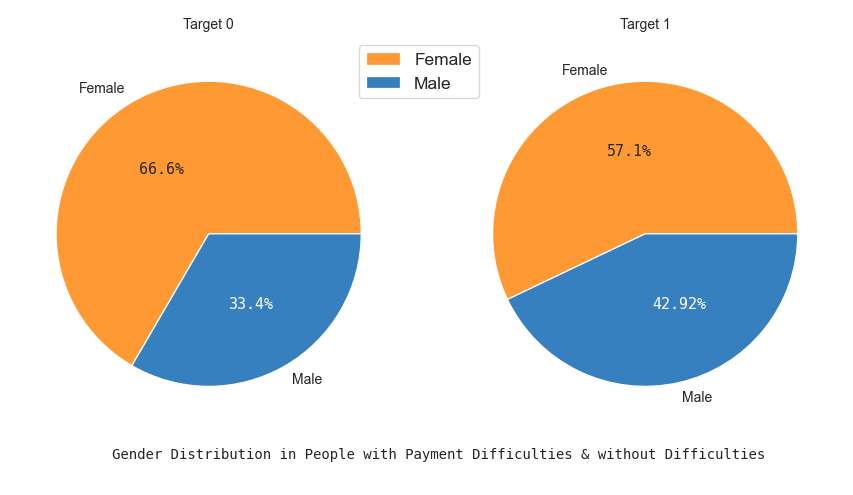

In [51]:
# Gender distribution of People with payment difficulties & without payment difficulties
target0_gender = target0["CODE_GENDER"].value_counts()
target1_gender = target1["CODE_GENDER"].value_counts()

fig = plt.figure(figsize=(5,2.5),dpi=180,tight_layout=True)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)
gs = fig.add_gridspec(1, 2)

ax0 = fig.add_subplot(gs[0, 0])
ax0.set_title('Target 0',fontsize=5.6)
plt.xticks(rotation=0)
target0_pie = plt.pie(x=target0_gender,colors=[orange,blue],
                     labels=['Male' if i=='M' else 'Female' for i in target0_gender.index],
                     textprops={'fontsize':5.6})
## Showing Percentage in pie chart
fig.text(0.28,0.28,
'''
{0}%
'''.format(round(100*(target0_gender['M']/target0_gender.sum()),2)),fontfamily='monospace',fontsize=6,c='white')

fig.text(0.18,0.58,
'''
{0}%
'''.format(round(100*(target0_gender['F']/target0_gender.sum()),1)),fontfamily='monospace',fontsize=6)




ax1 = fig.add_subplot(gs[0, 1])
ax1.set_title('Target 1',fontsize=5.6)
plt.xticks(rotation=0)
target1_pie = plt.pie(x=target1_gender,labels=['Male' if i=='M' else 'Female' for i in target1_gender.index],
                      colors=[orange,blue],textprops={'fontsize':5.6})
## Showing Percentage in pie chart
fig.text(0.75,0.28,
'''
{0}%
'''.format(round(100*(target1_gender['M']/target1_gender.sum()),2)),fontfamily='monospace',fontsize=6,c='white')
fig.text(0.70,0.62,
'''
{0}%
'''.format(round(100*(target1_gender['F']/target1_gender.sum()),1)),fontfamily='monospace',fontsize=6)


fig.text(0.15,-0.05,
'''
Gender Distribution in People with Payment Difficulties & without Difficulties
''',fontfamily='monospace',fontsize=5.6)

fig.legend(loc=[0.42,0.8], labels=['Female','Male'], fontsize='x-small')
plt.show()

#### Findings: 

- In both cases Females are of higher percentage.
- Though we can see for Target 1, male percentage is ~43% which is higher than Target 0. We can say Males are more likely to have difficulties in payment than Females.

### Analysis by Type of Income Source - NAME_INCOME_TYPE

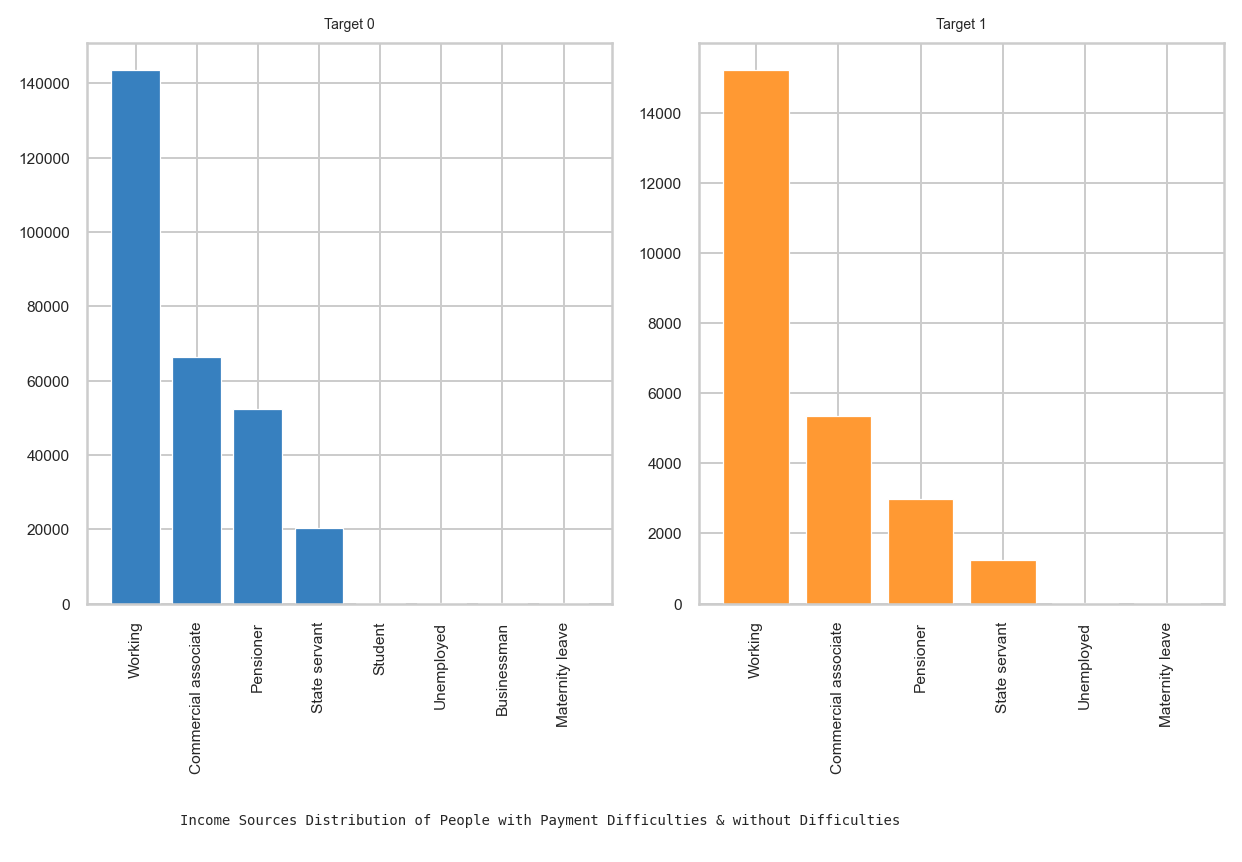

In [52]:
target0_income_type = target0["NAME_INCOME_TYPE"].value_counts()
target1_income_type = target1["NAME_INCOME_TYPE"].value_counts()


fig = plt.figure(figsize=(7,4.5),dpi=180,tight_layout=True)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)
gs = fig.add_gridspec(1, 2)

## Bar plot of Target 0
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_title('Target 0',fontsize=5.6)
plt.xticks(rotation=90,fontsize=6.2)
plt.yticks(fontsize=6.2)
target0_bar = plt.bar(x=target0_income_type.index,
                      height=target0_income_type,
                     color=blue)
                    
## Bar plot of Target 1
ax1 = fig.add_subplot(gs[0, 1])
ax1.set_title('Target 1',fontsize=5.6)
plt.xticks(rotation=90,fontsize=6.2)
plt.yticks(fontsize=6.2)
target1_bar = plt.bar(x=target1_income_type.index,
                      height=target1_income_type,
                     color=orange)


fig.text(0.15,-0.05,
'''
Income Sources Distribution of People with Payment Difficulties & without Difficulties
''',fontfamily='monospace',fontsize=5.6)
plt.show()

#### Finding: 
- We can see similar type of distribution of different "working" class in both Target 0 & Target 1 dataframe.
- But we see absence of `Business` & `Student` category for Target 1. We can assume they pay their loan on time. We can target these 2 category for loan application since they pay on time.

### Analysis Family Status - NAME_FAMILY_STATUS

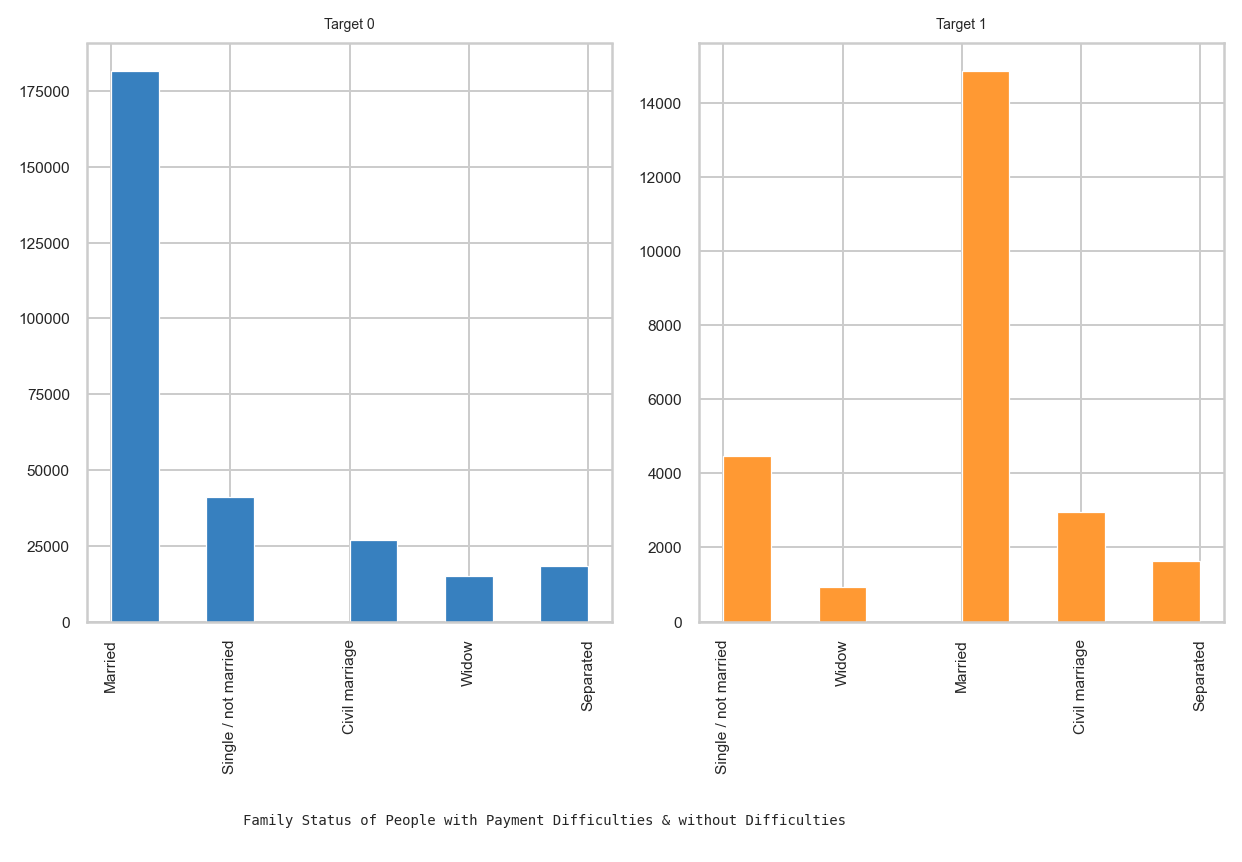

In [53]:
fig = plt.figure(figsize=(7,4.5),dpi=180,tight_layout=True)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)
gs = fig.add_gridspec(1, 2)

## Bar plot of Target 0
ax0 = fig.add_subplot(gs[0, 0])
ax0.set_title('Target 0',fontsize=5.6)
plt.xticks(rotation=90,fontsize=6.2)
plt.yticks(fontsize=6.2)
target0_hist = plt.hist(x=target0["NAME_FAMILY_STATUS"],
                      color=blue)
                    
## Bar plot of Target 1
ax1 = fig.add_subplot(gs[0, 1])
ax1.set_title('Target 1',fontsize=5.6)
plt.xticks(rotation=90,fontsize=6.2)
plt.yticks(fontsize=6.2)
target1_hist = plt.hist(x=target1["NAME_FAMILY_STATUS"],
                      color=orange)


fig.text(0.2,-0.05,
'''
Family Status of People with Payment Difficulties & without Difficulties
''',fontfamily='monospace',fontsize=5.6)
plt.show()

#### Findings: 
- In both Target 0 & Target 1, Married people applied for loan for max times. 
- Although, we can observe that number of clients having Single & Civil Marriage status tend to face difficulties with payment more than others.


### Analysis by Education Type 

In [54]:
target0_edu = target0["NAME_EDUCATION_TYPE"].value_counts()
target1_edu = target1["NAME_EDUCATION_TYPE"].value_counts()

In [55]:
edu0_df = pd.DataFrame({'labels': target0_edu.index,'values': target0_edu.values})
edu0_df.iplot(kind='pie',labels='labels',values='values',
              title='Education of Target 0', hole = 0.4, dimensions=(650,500))

In [56]:
edu1_df = pd.DataFrame({'labels': target1_edu.index,'values': target1_edu.values})
edu1_df.iplot(kind='pie',labels='labels',values='values',
              title='Education of Target 1', hole = 0.4, dimensions=(650,500))

#### Findings:
- An increase in % of people with payment difficulties can be seen who are education category - Secondary and Secondary special
- On the other hand,  People with Higher education type have shown less difficulties with payments 

### Analysis by Income Range - AMT_INCOME_BIN

In [57]:
# Income Bin are created as follows: 
# quartile range < 20% : Very_Low income range 
# quartlie range >20% and <50% - Low 
# quartitle range >50% and <80% - Medium 
# quartile range >80% and <95% - High 
# quartile range >95% - Very High 
target0_inc = target0["AMT_INCOME_BIN"].value_counts()
target1_inc = target1["AMT_INCOME_BIN"].value_counts()

In [58]:
inc0_df = pd.DataFrame({'labels': target0_inc.index,'values': target0_inc.values})
inc0_df.iplot(kind='pie',labels='labels',values='values', title='Income range of Target 0', hole = 0.5, dimensions=(650,500))

In [59]:
inc1_df = pd.DataFrame({'labels': target1_inc.index,'values': target1_inc.values})
inc1_df.iplot(kind='pie',labels='labels',values='values', title='Income range of Target 1', hole = 0.5, dimensions=(650,500))

#### Inference:

- Though distribution in almost similar, we see an increase in percentage value of `Medium`, `Low`, `Very_Low` in Target 1.
- We can have more safety measure for these income groups.

### Analysis by Age-Group

In [60]:
target0_age = target0["AGE_BIN"].value_counts()
target1_age = target1["AGE_BIN"].value_counts()

In [61]:
age0_df = pd.DataFrame({'labels': target0_age.index,'values': target0_age.values})
age0_df.iplot(kind='pie',labels='labels',values='values', title='Age distribution of Target 0', hole = 0.5, dimensions=(650,500))

In [62]:
age1_df = pd.DataFrame({'labels': target1_age.index,'values': target1_age.values})
age1_df.iplot(kind='pie',labels='labels',values='values', title='Age distribution of Target 1', hole = 0.5, dimensions=(650,500))

#### Findings:
- It can be observed that Young & Very young clients are facing difficulties with payments, while all other age groups are more promising groups when it comes to payments on time.
- Here, Young clients are assumed to be aged between - 19-25 yrs and Very young clients are aged less than 19 yrs old

### Doing further detailed Univariate Analysis for some categorical variables, specifically for Target=1 type clients

In [63]:
# Function to count categorical value & their percentage distribution for clients with Loan Repayment Difficulties (Target=1)
def univar_bar(df,column,title):
    val_df = df[column].value_counts()
    
    # Calculate the percentage of target=1 for given column
    percentage = df[[column, 'TARGET']].groupby([column],as_index=False).mean()
    percentage.sort_values(by='TARGET', ascending=False, inplace=True)

    fig = make_subplots(rows=1, cols=2,
                   column_width=[0.5,0.5],
                   subplot_titles=[title+' Count', 'Percentage Distribution with Payment Difficulties'])
    
    fig.append_trace(go.Bar(x=val_df.index,
                       y=val_df.values,
                       orientation='v',
                       marker={'color': blue,'line': dict(color=blue, width=1)},
                       name=''
                       ), 1,1
                )
    fig.append_trace(go.Bar(x=percentage[column].to_list(),
                       y=percentage['TARGET'].to_list(),
                       orientation='v',
                       marker={'color': orange,'line': dict(color=orange, width=1)},
                       name=''
                       ), 1,2
                )
    fig.update_layout(
        showlegend=False,
        title_text=title,
        title_font_size=24,
        height=470, width=950)
    fig.show()

#### Distribution on Income Range & Percentage distribution with Repayment difficulties

In [64]:
univar_bar(app_df ,'AMT_INCOME_BIN','Income Range')

##### Findings: 
- We can see that people with Low income have maximum payment difficulties & People with low income also constitute second highest within total application
- Based on income range analysis, we can observe that clients with Very-high & High income have the least tendency to have difficulties with payment. We can target these groups for loan application.


#### Distribution of Income Source Type & their percentage with Payment Difficulties

In [65]:
univar_bar(app_df ,'NAME_INCOME_TYPE','Income Type')

##### Findings: 
- Though Maternity leave constitute lowest number out of total application, maximum percentage of them have Loan Repayment difficulties. 
- Out of total Unemployed applicant, 36% i.e 2nd highest, have loan repayment difficulties.
- Student, Businessman don't seems to delay in loan repayment.

#### Distribution according to Education Type & their percentage with Payment Difficulties

In [66]:
univar_bar(app_df ,'NAME_EDUCATION_TYPE','Education Type')

##### Finding: 
- We see that more educated people have less payment difficulties.
- Though lower Secondary educated people have lower percentage in loan application, out of those ~11% people have difficulties in payment.

#### Distribution of Occupation Type & their percentage for Loan Payment difficulties

In [67]:
univar_bar(app_df ,'OCCUPATION_TYPE','Occupation Type')

##### Finding: 
- We can see that clients with 'Lower skill Laborers' occupation type have maximum percentage of Loan Payment Difficulties.
- Laborers have second highest in loan application but 10.5% have loan payment difficulties. 

## Univariate Numerical Analysis:

In [68]:
# Function for univariate plots
def uni(df0,df1,col,hue=None):
    fig = plt.figure(figsize=(6,3),dpi=180,tight_layout=True)
    plt.rc('xtick', labelsize=9)
    plt.rc('ytick', labelsize=9)
    gs = fig.add_gridspec(1, 2)
    
    ax0 = fig.add_subplot(gs[0, 0])
    plt.xticks(rotation=0,fontsize=5.8)
    plt.yticks(fontsize=5.8)
    ax0.set_title("Distribution Plot for Target 0",fontsize=5.8)
    ax0.set_xlabel(col,fontsize=5.8)
    ax0.set_ylabel('Density',fontsize=5.8)
    
    ax1 = fig.add_subplot(gs[0, 1])
    plt.xticks(rotation=0,fontsize=5.8)
    plt.yticks(fontsize=5.8)
    ax1.set_title("Distribution Plot for Target 1",fontsize=5.8)
    ax1.set_xlabel(col,fontsize=5.8)
    ax1.set_ylabel('Density',fontsize=5.8)

    
    sns.distplot(df0[~df0[col].isna()][col],ax=ax0, color=blue)
    sns.distplot(df1[~df1[col].isna()][col],ax=ax1, color=blue)
    
    
    plt.show()

### Distribution of AMT_ANNUITY

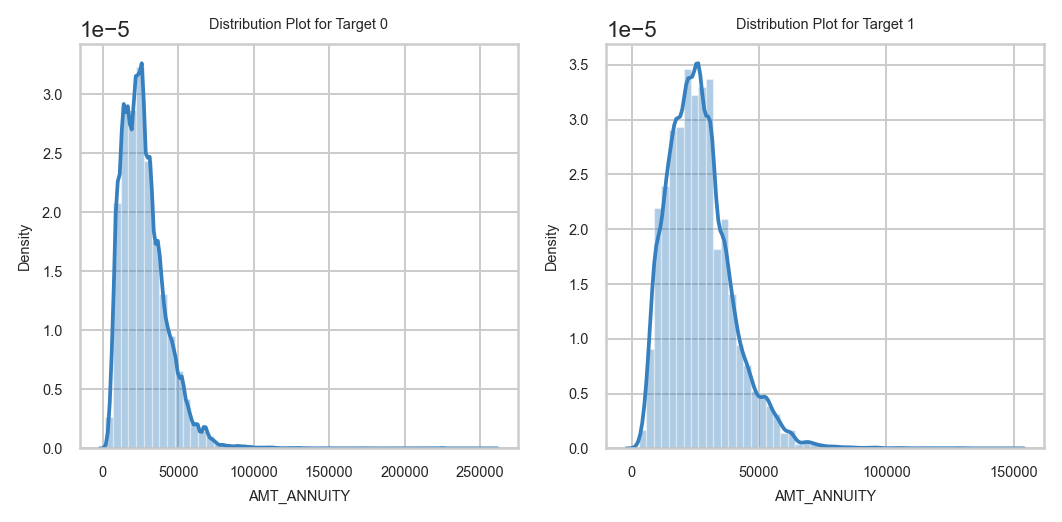

In [69]:
#Checking the distribution of Annuity Amount variable - 
uni(df0=target0,df1=target1,col='AMT_ANNUITY')

- There seems to be some outliers in both Target 0 & Target 1.

### Distribution of AMT_CREDIT

In [70]:
uni(df0=target0,df1=target1,col='AMT_CREDIT')

- Distribution curve doesn't seem to be a normal distribution/ bell shaped. There are outliers in both Targe 0 & Target 1.

### Distribution of CNT_CHILDREN

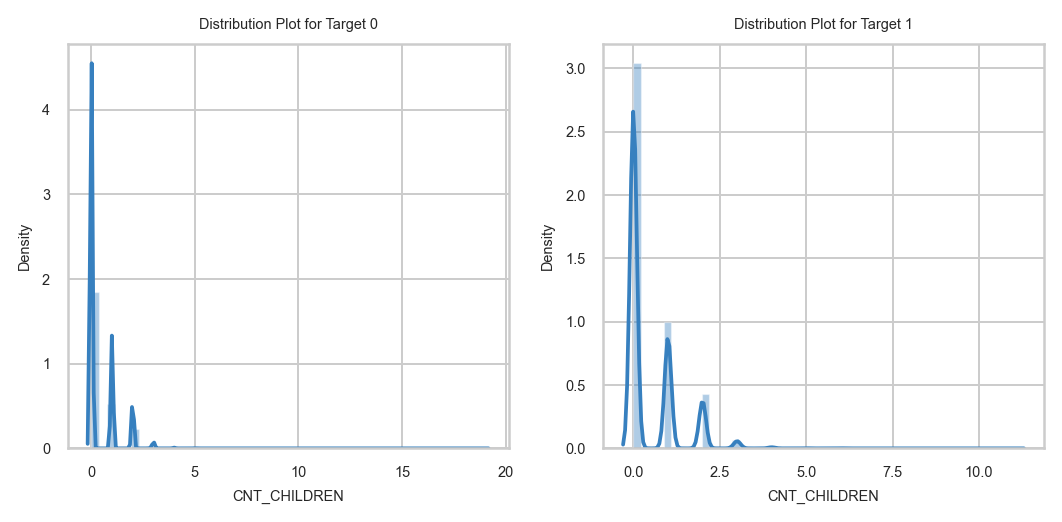

In [71]:
uni(df0=target0,df1=target1,col='CNT_CHILDREN')

- Since children no is not continuous & is actually discrete, we see such distribution. We see similar distribution in both Target 0 & Target 1.

### Distribution of DAYS_EMPLOYED

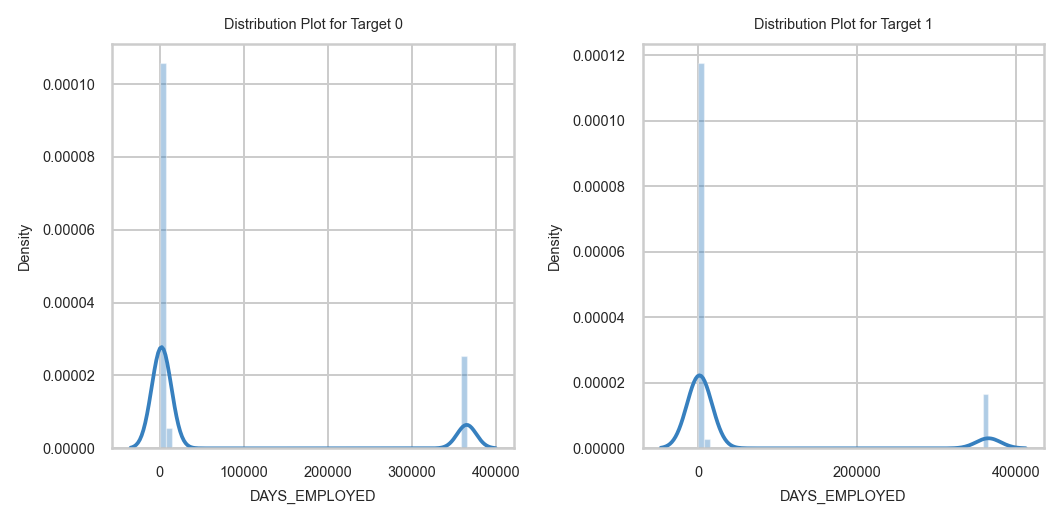

In [72]:
uni(df0=target0,df1=target1,col='DAYS_EMPLOYED')

- We see some values at 0 & some values at very high no. 400000 is equivalent to ~1000yr which seems impossible. We can assume that people are finding difficulties filling this data during their loan application & that's why they are filling values randomly. We need to find a way, so people can fill this field with ease.

### Distribution of AMT_GOODS_PRICE

In [73]:
uni(df0=target0,df1=target1,col='AMT_GOODS_PRICE')

- For both target 0 & target 1, we can see that distribution is not bell shaped, i.e not normally distributed.

## Bivariate Analysis


### Heatmap for Target = 0

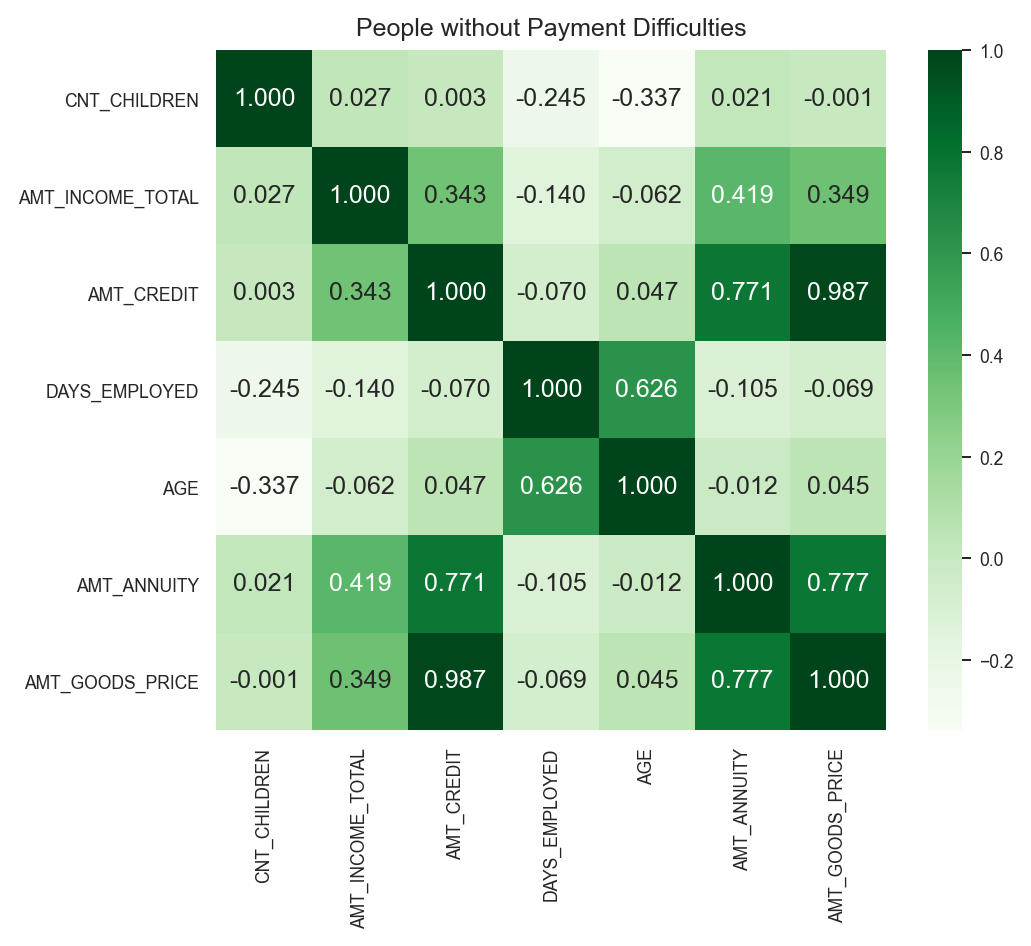

In [74]:
#Identifying correlation between relavant Numerical columns for Target = 0 i.e all other clients who have not defaulted payment 
fig = plt.figure(figsize=(6,5),dpi=180)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)

sns.heatmap(target0[["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "DAYS_EMPLOYED", 
                     "AGE", "AMT_ANNUITY", "AMT_GOODS_PRICE"]].corr(), 
            annot = True, cmap = "Greens", fmt='.3f')
plt.title('People without Payment Difficulties',fontsize=10)
plt.show()

#### Observations: For Target 0 type clients 

- We can see positive correlation between Total Income & Loan Amount/Credit Amount sanctioned to the clients
- High Annuity Amount is also related to High Amount credit an vice-versa - A positive correlation 
- A negative correlation can be observed between Amount of Goods for which loan is applied and the duration of employment of the client
- A positive correlation between Amount of Goods for which loan is applied and Age can be observed 

### Heatmap for Target = 1

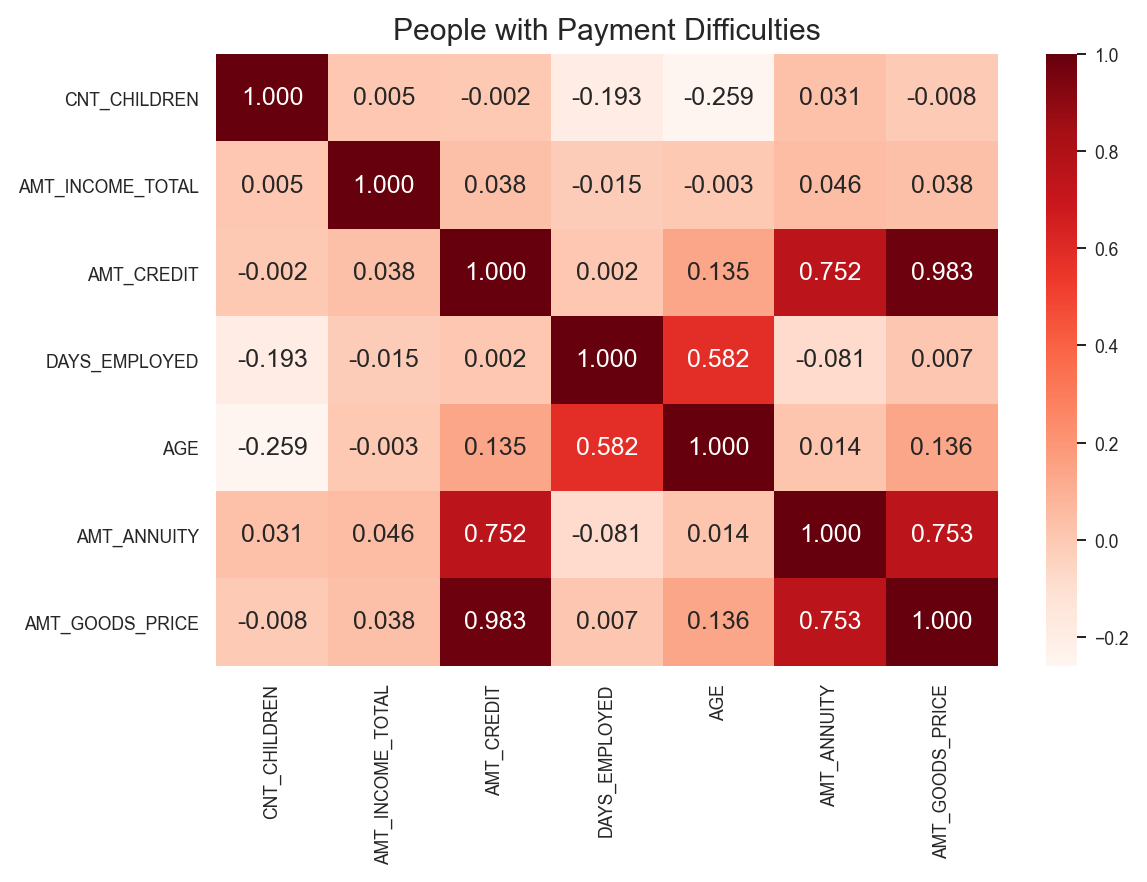

In [75]:
#Identifying correlation between relavant Numerical columns for Target = 1 i.e all clients who have defaulted payment 
fig = plt.figure(figsize=(7,4.5),dpi=180)
plt.rc('xtick', labelsize=7)
plt.rc('ytick', labelsize=7)

sns.heatmap(target1[["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "DAYS_EMPLOYED", "AGE", 
                     "AMT_ANNUITY", "AMT_GOODS_PRICE"]].corr(method = 'pearson'), 
            annot = True, cmap = "Reds", fmt='.3f')
plt.title('People with Payment Difficulties',fontsize=12)
plt.show()

#### Observations: For Target 1 type clients
- We see some correlation of `AGE` with `AMT_CREDIT`.
- We see some negative correlation of `CNT_CHILDREN` with `AGE` & `DAYS_EMPLOYED`.

### Scatter Plot for numerical Columns

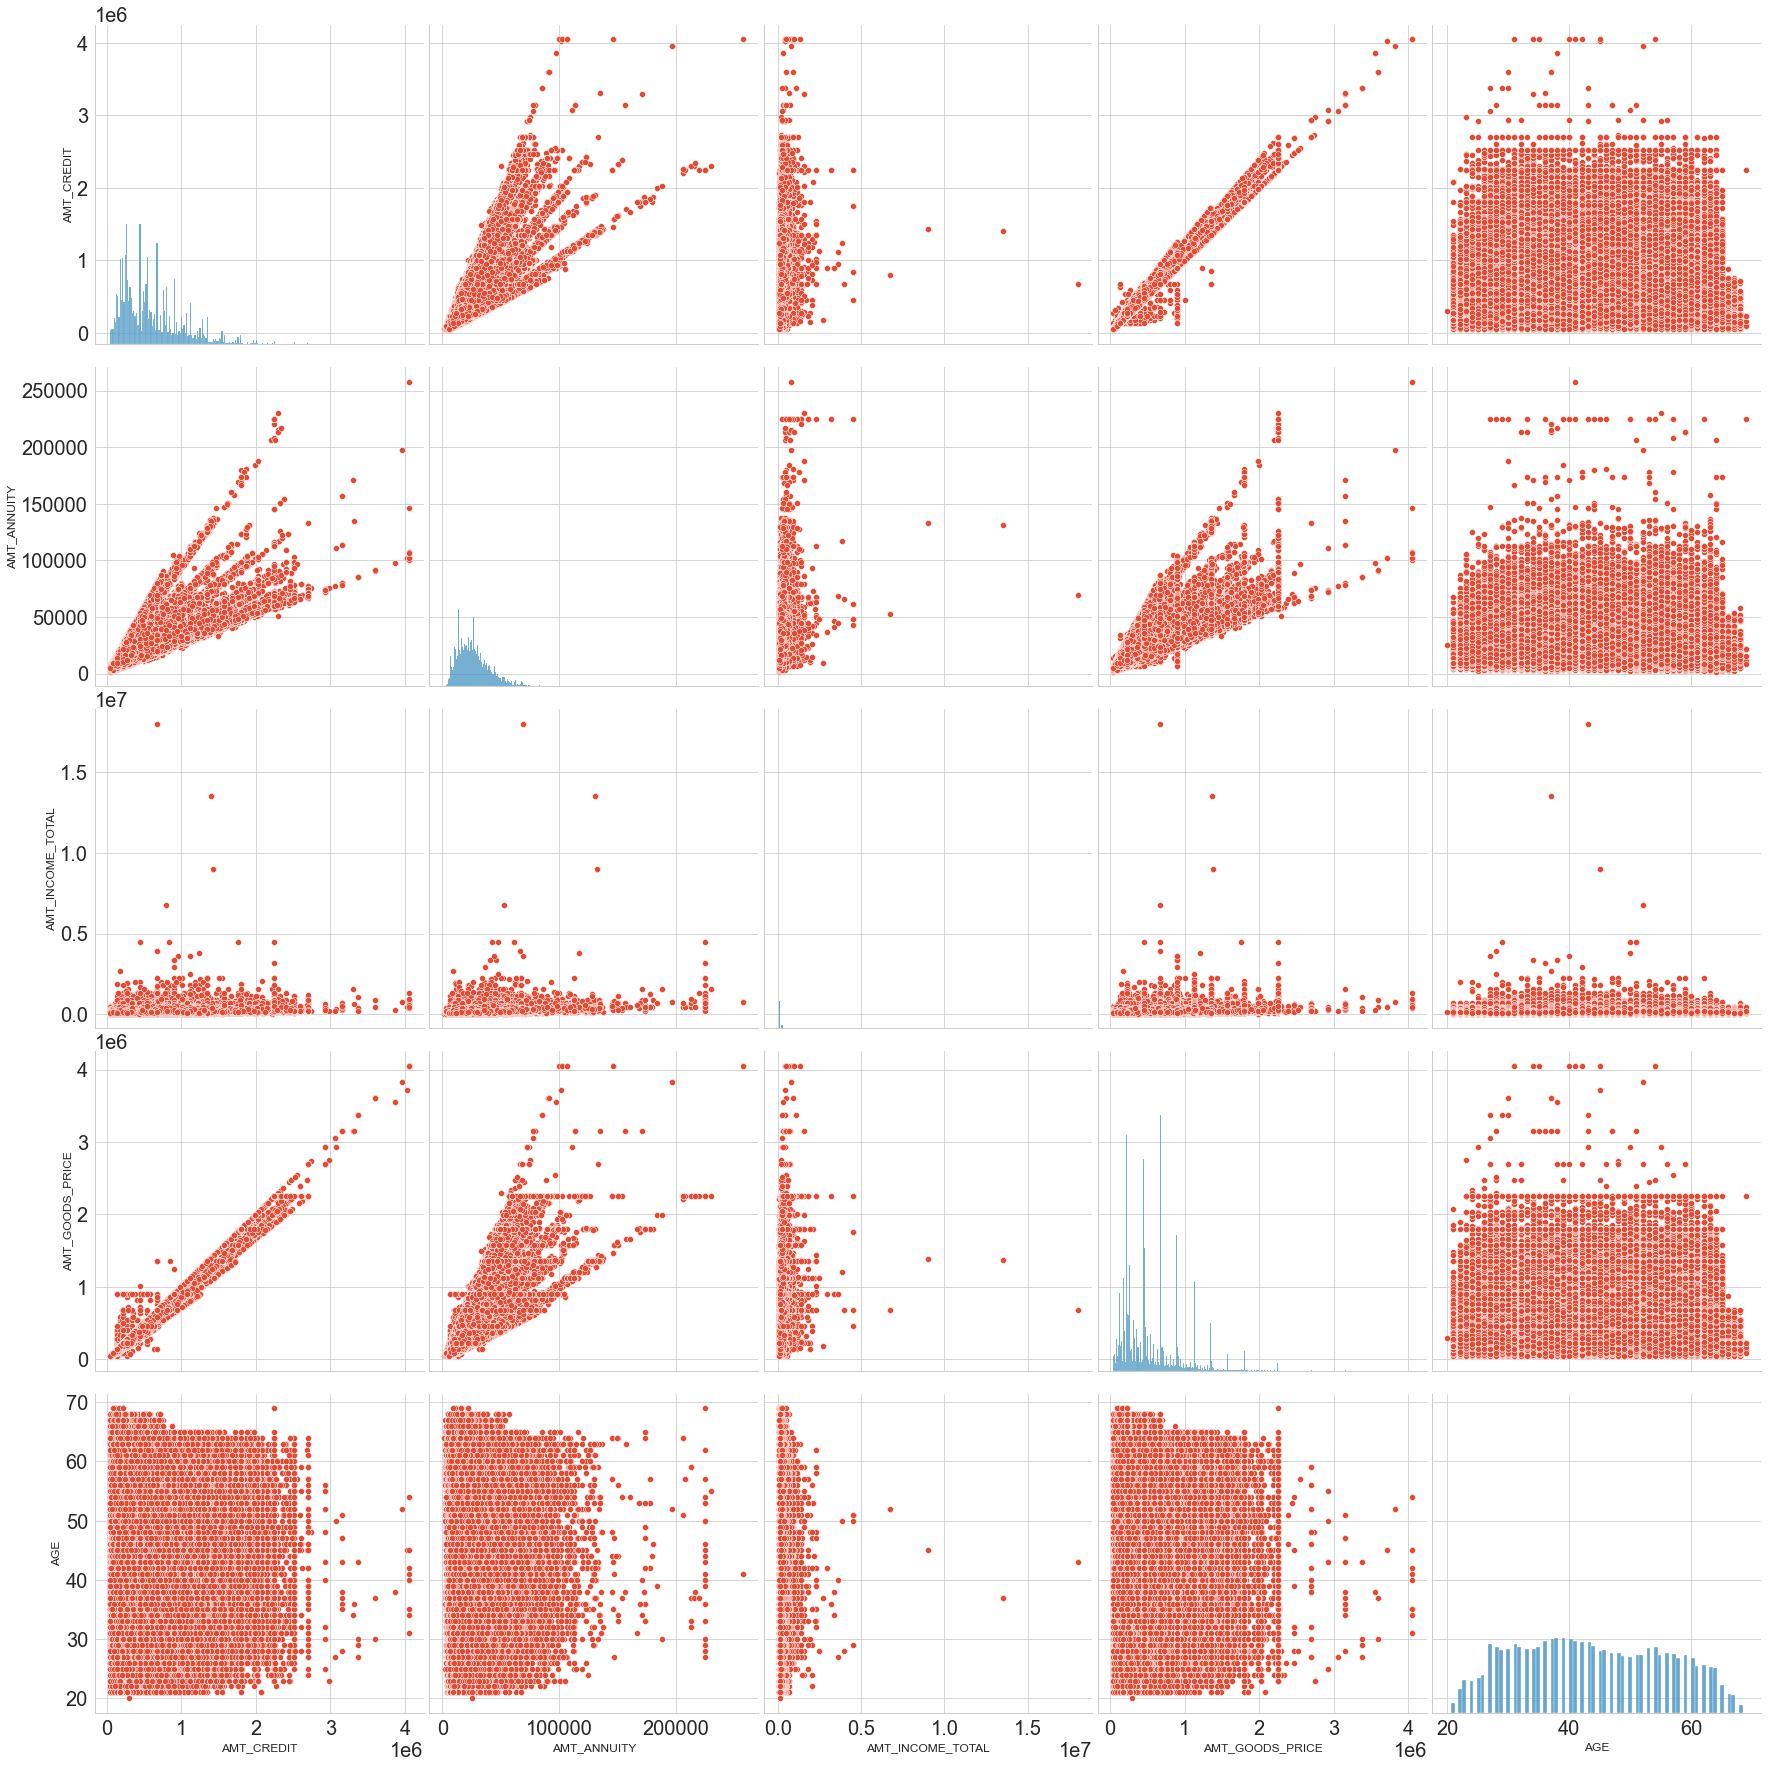

In [76]:
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

sns.pairplot(target0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'AGE']], dropna=True,height=5)

plt.show()

#### Observations: For Target 0 type clients

- We don't see much application for high income group. Loan application seems to be dense near lower income range.
- We see `AMT_CREDIT` increases with `AMT_GOODS_PRICE`.

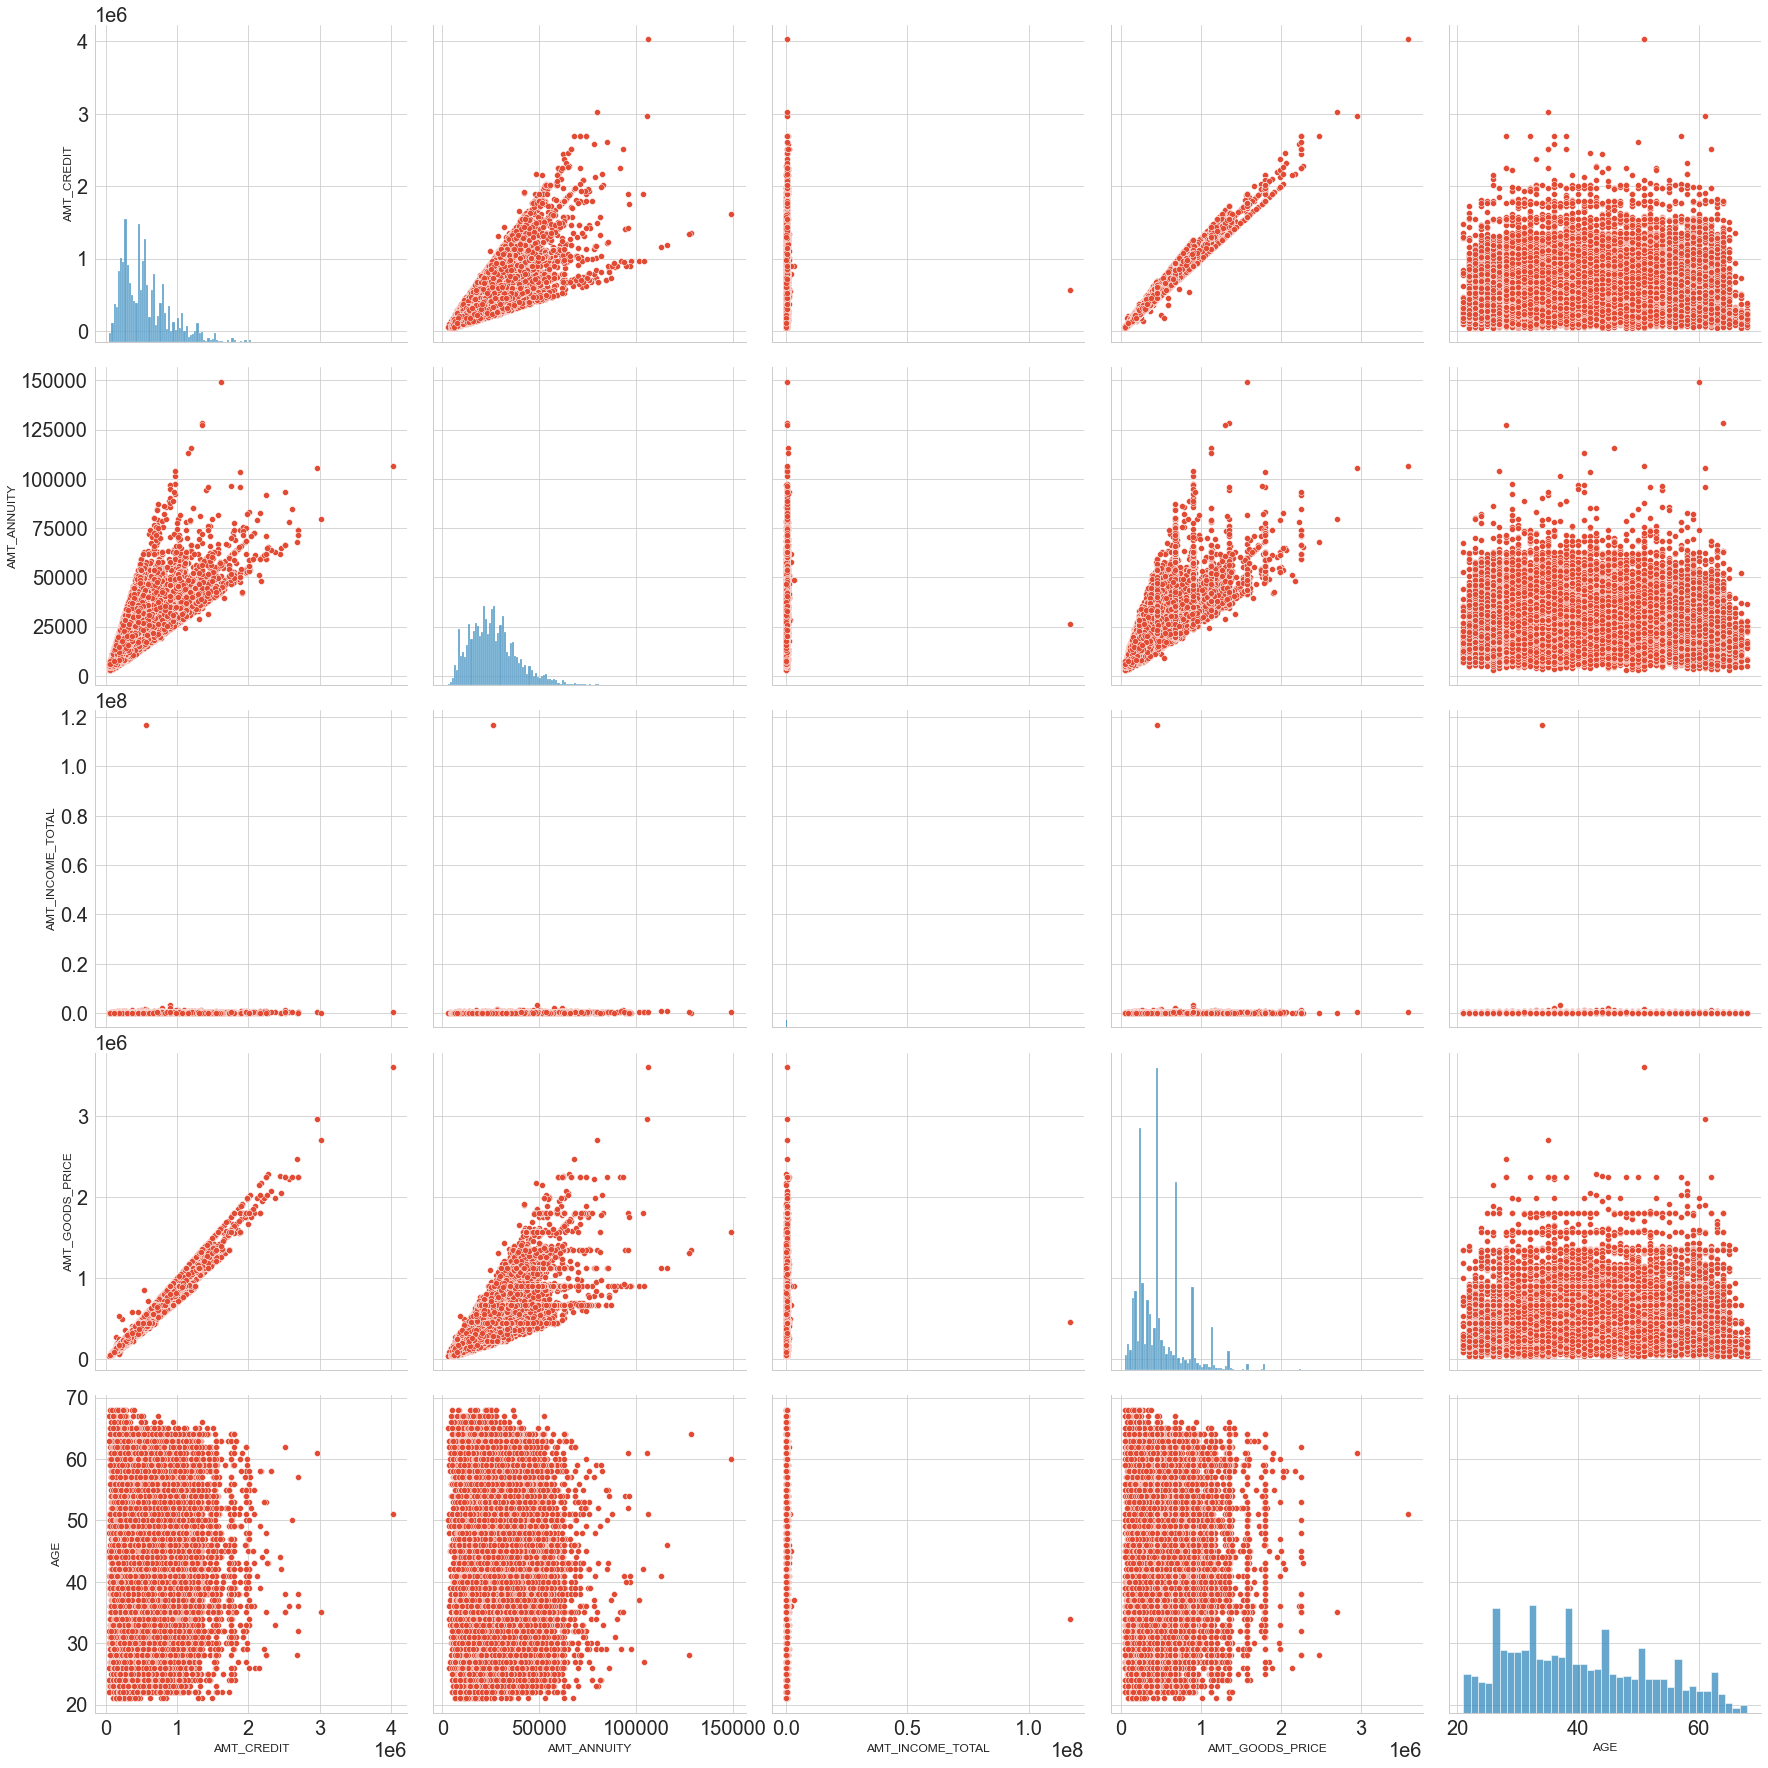

In [77]:
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

sns.pairplot(target1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'AGE']], dropna=True,height=5)
plt.show()

#### Observations: For Target 1 type clients

- We don't see many application for high income group. Loan application seems to be confined to lower income group. However we see an outlier in high income group.
- We see `AMT_CREDIT` increases with `AMT_GOODS_PRICE`.
- Other distribution seems to be similar with Target 0.

## Multivariate analysis

In [78]:
# Box Plot Function for Multi-variate analysis
def mul_box(df,x,y,hue,xlabel,ylabel,title,logscale=False):
    fig = plt.figure(figsize=(12,7),dpi=180)
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    plt.xticks(rotation=45)
    if logscale:
        plt.yscale('log')
    df_box = sns.boxplot(data =df, x=x,y=y, hue =hue,orient='v', 
               fliersize=2,linewidth=1)
    df_box.set_title(title)
    df_box.set_ylabel(ylabel,fontsize=12)
    df_box.set_xlabel(xlabel,fontsize=12)
    plt.show()

### Between Credit amount & Education & Family Status 

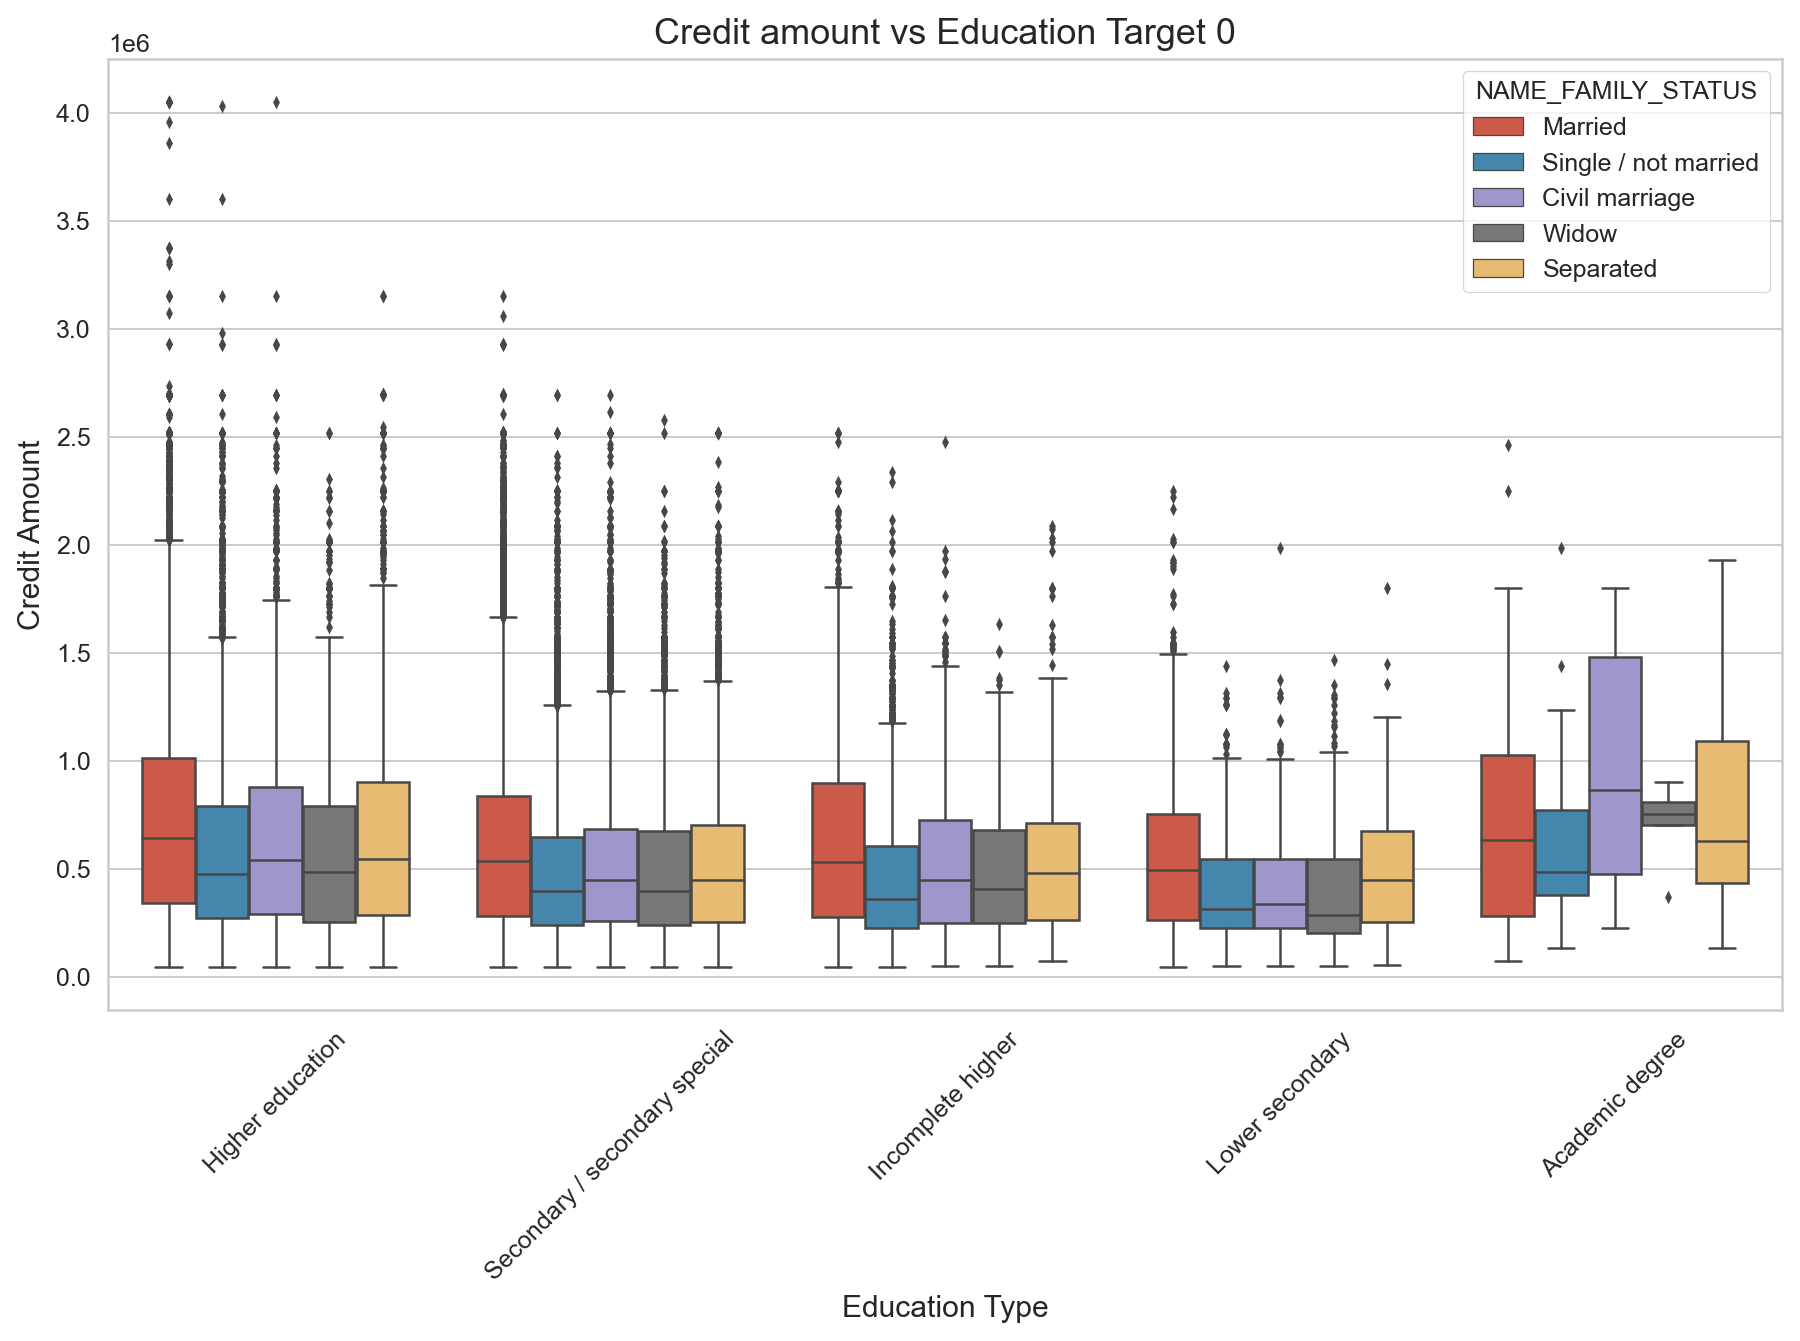

In [79]:
mul_box(target0,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS',
      title='Credit amount vs Education Target 0',
     xlabel='Education Type',ylabel='Credit Amount')

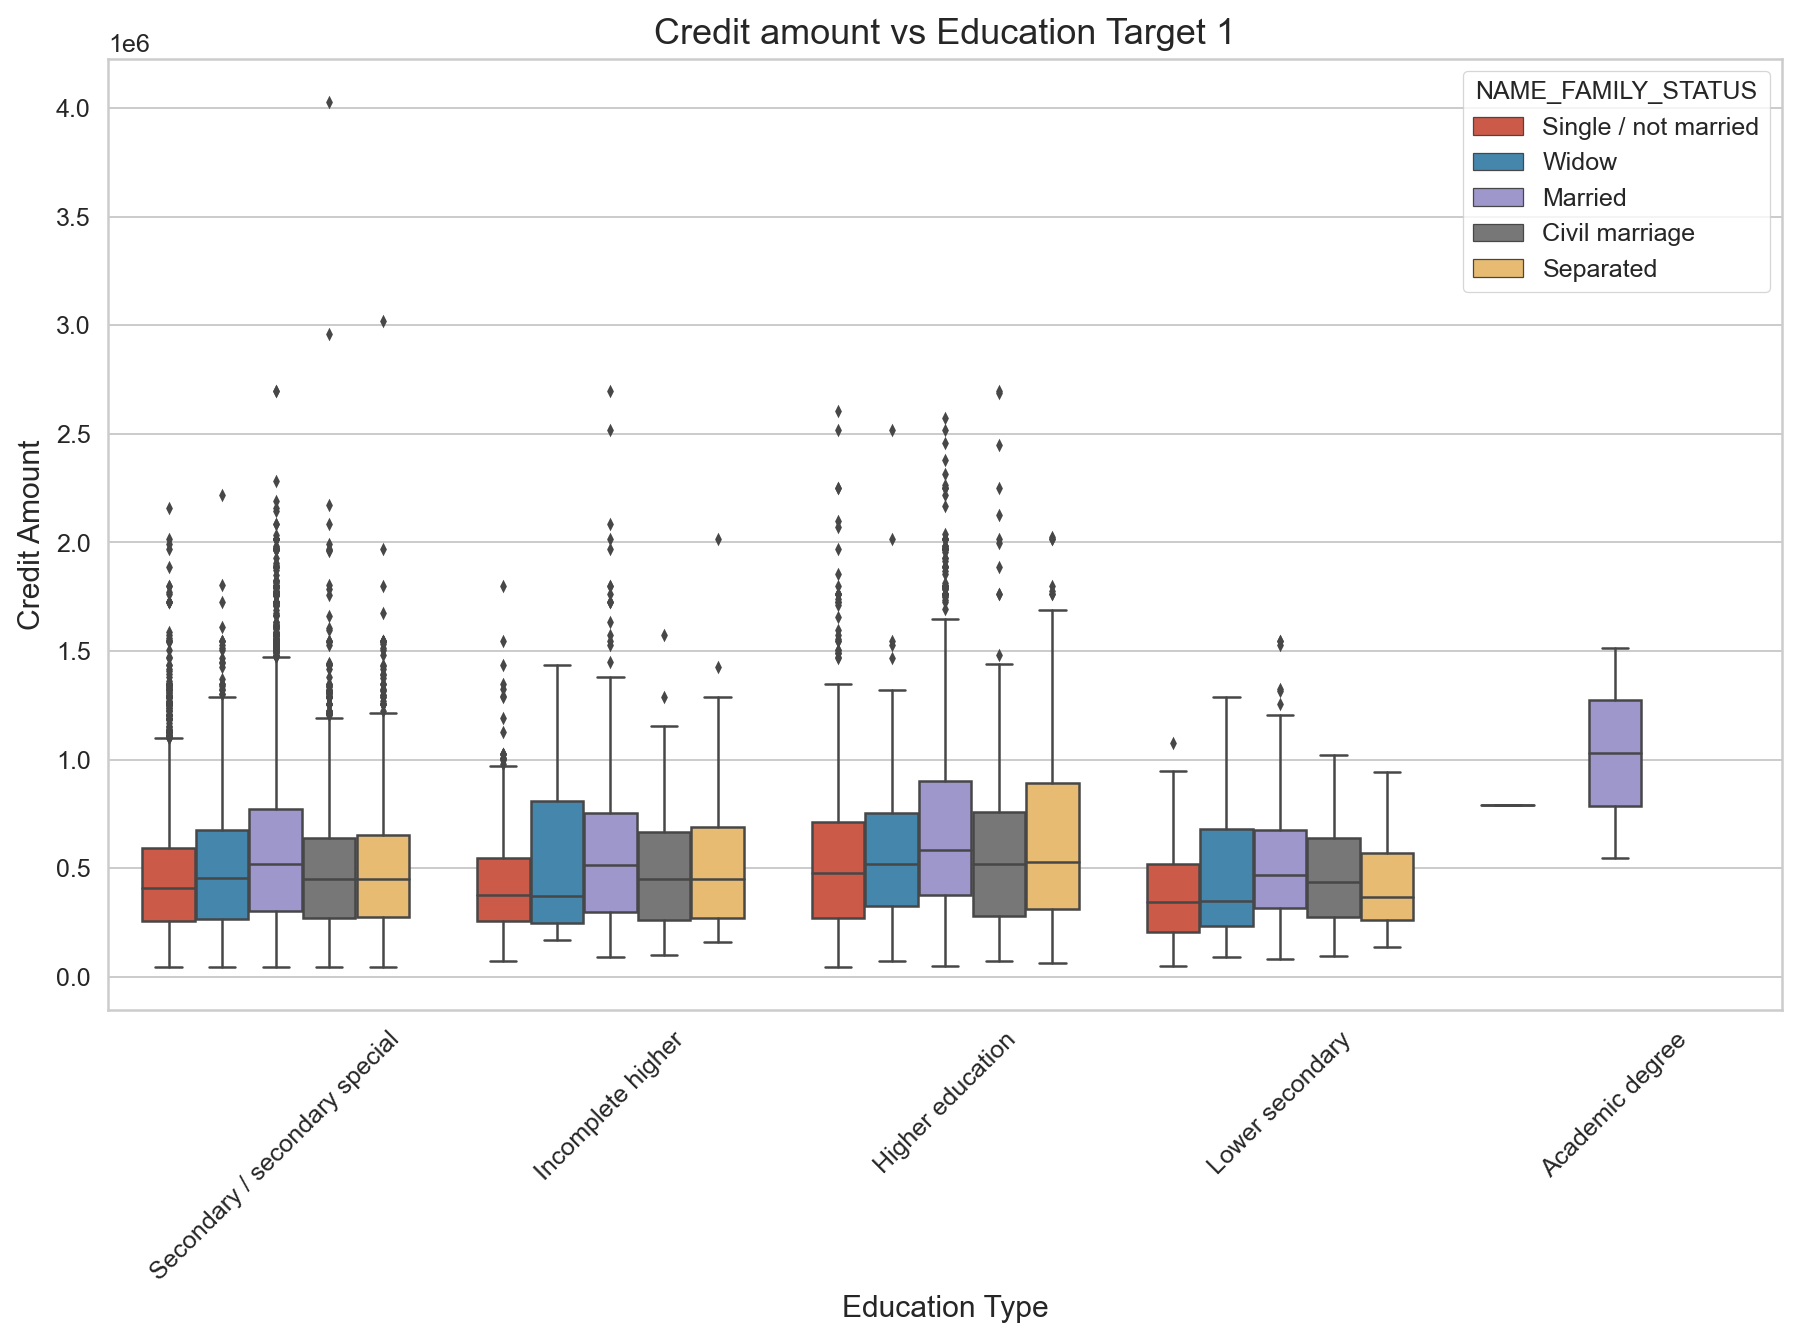

In [80]:
mul_box(target1,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='NAME_FAMILY_STATUS',
      title='Credit amount vs Education Target 1',
     xlabel='Education Type',ylabel='Credit Amount')

#### Inference

- **For target 0**:
  1. We can see that Higher Education, Incomplete Higher & Secondary Education have higher outlier in all marital status. For Academic degree, with civil marriage & Separated marital status cases have most credit in third quartile.
  2. Also people with  Academic Degree, except single & widow marital status people, other have more credit amount.

- **For Target 1**:
  1. We can see that People with payment difficulties, Married & with Academic education, they have low credit amount.
  2. People with Lower Secondary Education have very few outlier. So the credit amount is mostly uniform.
  3. People with Incomplete Higher education with 'Widow' marital status have a longer third quartile. That is also the case with people with Lower Secondary Education.

### Between Income & Education Status

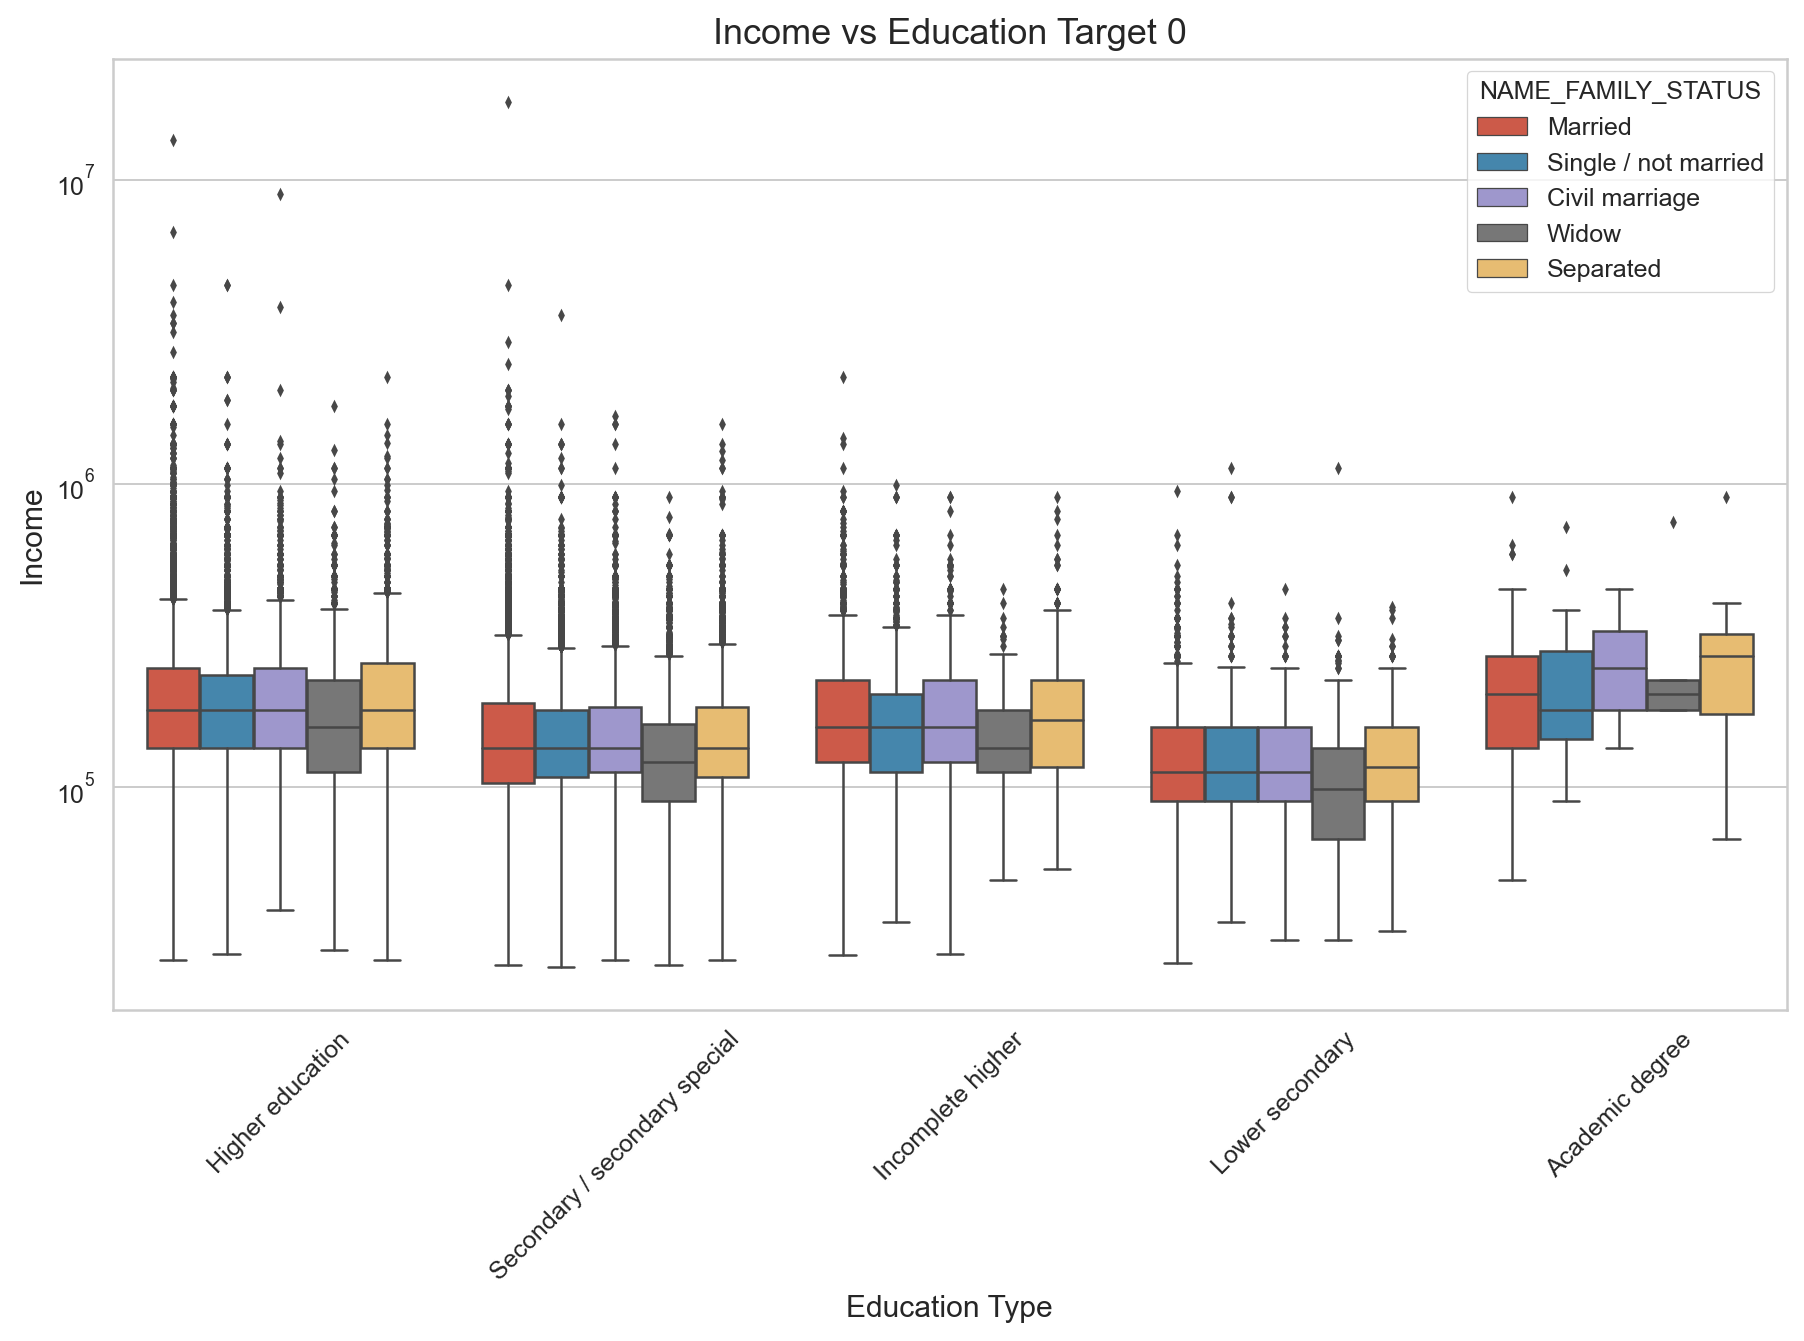

In [81]:
mul_box(target0,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue='NAME_FAMILY_STATUS',
      title='Income vs Education Target 0',
     xlabel='Education Type',ylabel='Income',logscale=True)

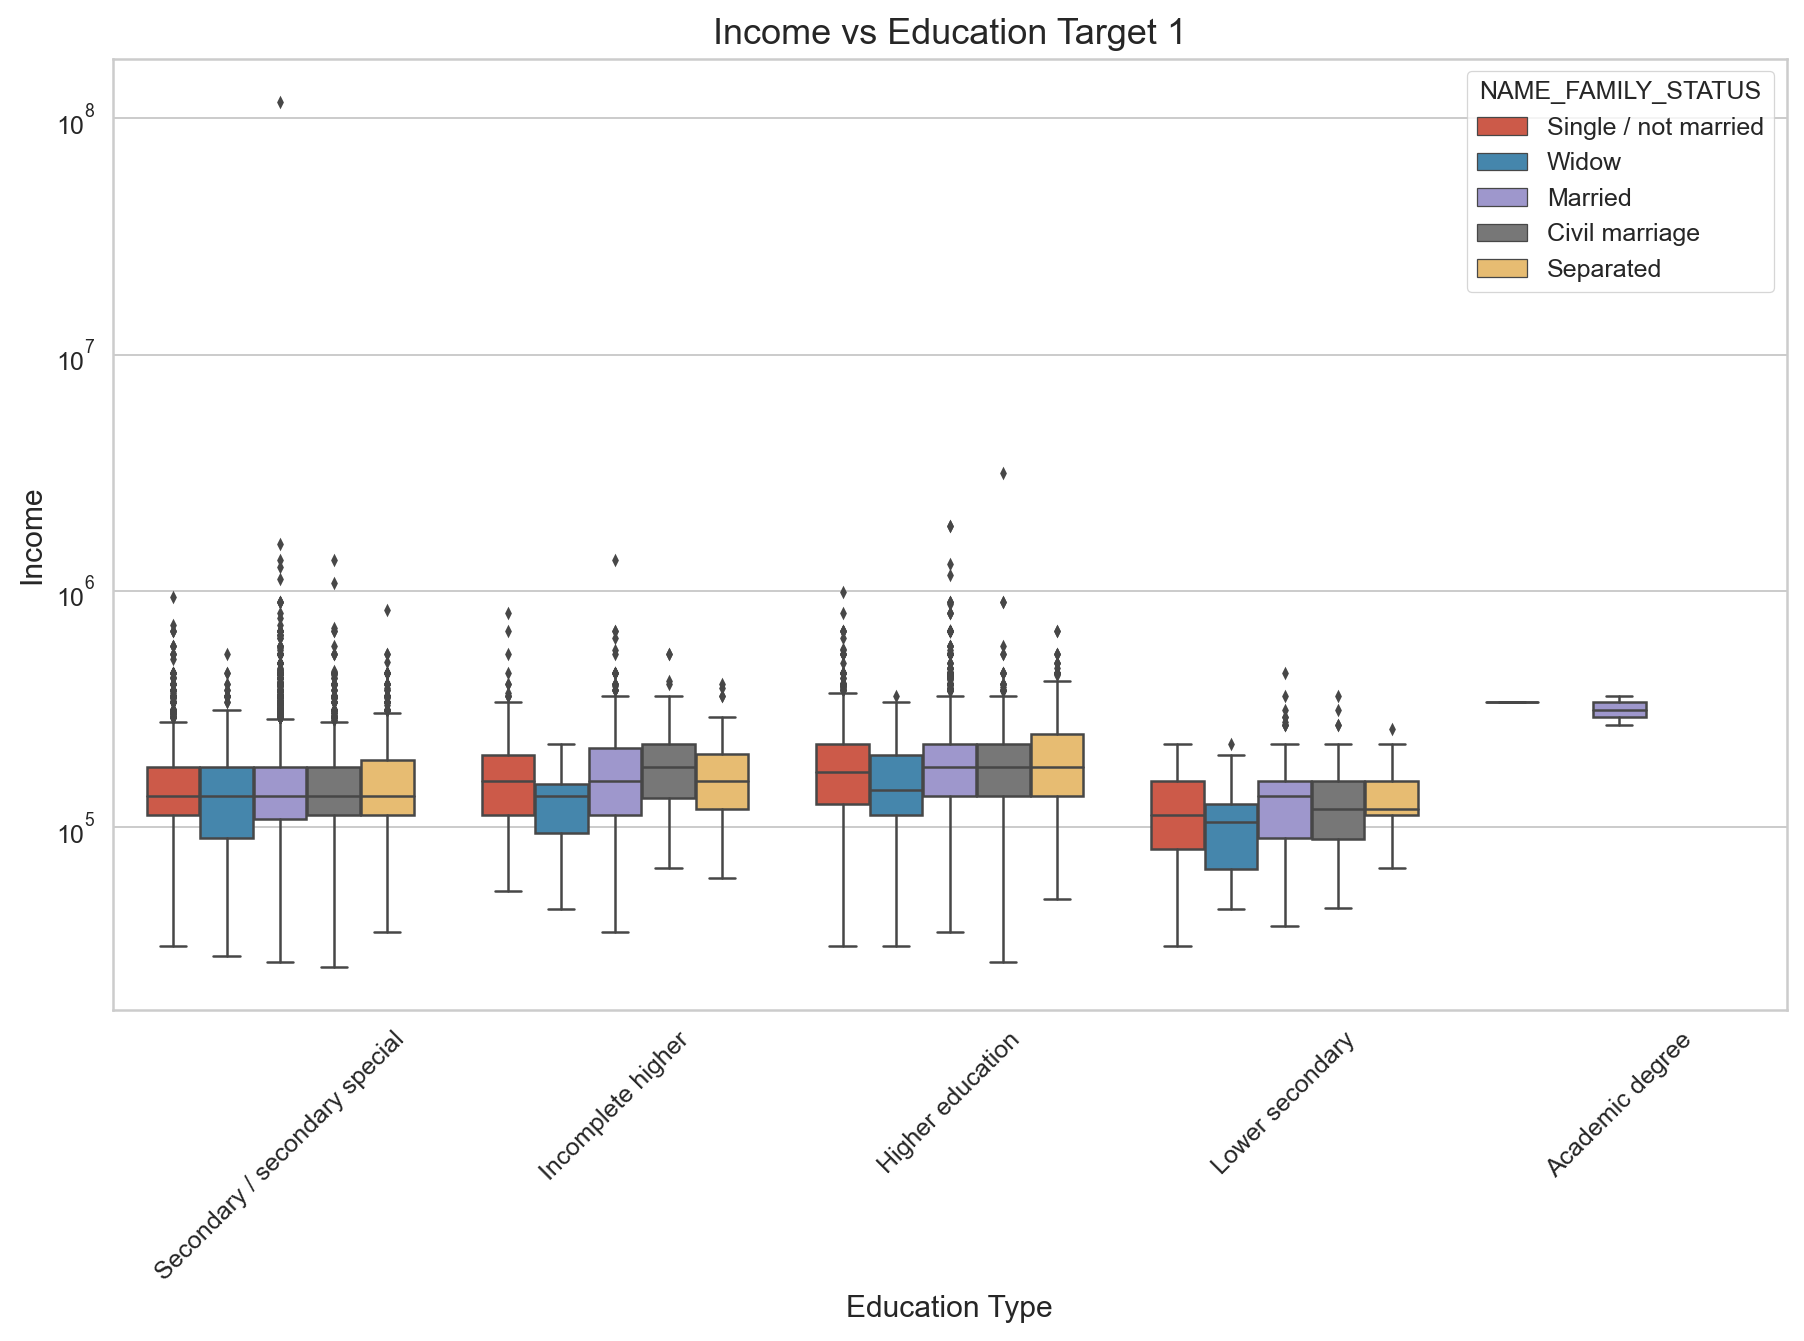

In [82]:
mul_box(target1,x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',hue='NAME_FAMILY_STATUS',
      title='Income vs Education Target 1',
     xlabel='Education Type',ylabel='Income',logscale=True)

#### Inference:

- **For Target 0:**
  1. People with Higher education have lot of outlier. While People with Academic Degree have few outliers.
  2. People with Widow Marital status have comparatively lower income in same Education type group.
  3. People with Academic Degree have more people in 1st quartile for 'Separated' marital status.
- **For Target 1:**
  1. Very few people, mostly married, with Academic Degree have payment difficulties after applying loan.
  2. People with Secondary & Higher Education have mostly outliers.
  3. Widow people have less income in most cases.

## Part 2:  Loading Previous Application Data & Overviewing

Inspecting the dataframes for dimensions, null-values, and summary of different numeric columnns

In [83]:
prev_df = pd.read_csv('previous_application.csv')

In [84]:
prev_df.head(6)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   
5     1383531      199383         Cash loans    23703.930         315000.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   
5    340573.5               NaN         315000.0                   SATURDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   
5                        8                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   
5                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   
5                       NaN      Everyday expenses             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   
5           -684  Cash through the bank                XAP           Family   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   
5         Repeater                 XNA           Cash            x-sell   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1  

In [85]:
# Checking the number of rows and columns in the dataframe - prev_application
prev_df.shape

(1670214, 37)

In [86]:
# Checking the column-wise info of prev_application to check for amount of null values & data-types 
prev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [87]:
# Checking the statistical information of numerical columns of the dataframe - prev_application
prev_df.describe().apply(lambda s: s.apply('{0:.3f}'.format))

SK_ID_PREV   SK_ID_CURR  AMT_ANNUITY AMT_APPLICATION   AMT_CREDIT  \
count  1670214.000  1670214.000  1297979.000     1670214.000  1670213.000   
mean   1923089.135   278357.174    15955.121      175233.860   196114.021   
std     532597.959   102814.824    14782.137      292779.762   318574.617   
min    1000001.000   100001.000        0.000           0.000        0.000   
25%    1461857.250   189329.000     6321.780       18720.000    24160.500   
50%    1923110.500   278714.500    11250.000       71046.000    80541.000   
75%    2384279.750   367514.000    20658.420      180360.000   216418.500   
max    2845382.000   456255.000   418058.145     6905160.000  6905160.000   

      AMT_DOWN_PAYMENT AMT_GOODS_PRICE HOUR_APPR_PROCESS_START  \
count       774370.000     1284699.000             1670214.000   
mean          6697.402      227847.279                  12.484   
std          20921.495      315396.558                   3.334   
min             -0.900           0.000                   0.000   
25%              0.000       50841.000                  10.000   
50%           1638.000      112320.000                  12.000   
75%           7740.000      234000.000                  15.000   
max        3060045.000     6905160.000                  23.000   

      NFLAG_LAST_APPL_IN_DAY RATE_DOWN_PAYMENT RATE_INTEREST_PRIMARY  \
count            1670214.000        774370.000              5951.000   
mean                   0.996             0.080                 0.188   
std                    0.059             0.108                 0.088   
min                    0.000            -0.000                 0.035   
25%                    1.000             0.000                 0.161   
50%                    1.000             0.052                 0.189   
75%                    1.000             0.109                 0.193   
max                    1.000             1.000                 1.000   

      RATE_INTEREST_PRIVILEGED DAYS_DECISION SELLERPLACE_AREA  CNT_PAYMENT  \
count                 5951.000   1670214.000      1670214.000  1297984.000   
mean                     0.774      -880.680          313.951       16.054   
std                      0.101       779.100         7127.443       14.567   
min                      0.373     -2922.000           -1.000        0.000   
25%                      0.716     -1300.000           -1.000        6.000   
50%                      0.835      -581.000            3.000       12.000   
75%                      0.853      -280.000           82.000       24.000   
max                      1.000        -1.000      4000000.000       84.000   

      DAYS_FIRST_DRAWING DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  \
count         997149.000     997149.000                997149.000   
mean          342209.855      13826.269                 33767.774   
std            88916.116      72444.870                106857.035   
min            -2922.000      -2892.000                 -2801.000   
25%           365243.000      -1628.000                 -1242.000   
50%           365243.000       -831.000                  -361.000   
75%           365243.000       -411.000                   129.000   
max           365243.000     365243.000                365243.000   

      DAYS_LAST_DUE DAYS_TERMINATION NFLAG_INSURED_ON_APPROVAL  
count    997149.000       997149.000                997149.000  
mean      76582.403        81992.344                     0.333  
std      149647.415       153303.517                     0.471  
min       -2889.000        -2874.000                     0.000  
25%       -1314.000        -1270.000                     0.000  
50%        -537.000         -499.000                     0.000  
75%         -74.000          -44.000                     1.000  
max      365243.000       365243.000                     1.000

In [88]:
# Value counts of columns
print_value_count(prev_df,prev_df.columns)

SK_ID_PREV:
1001961    1
1210139    1
1279781    1
1281828    1
1292067    1
          ..
2444802    1
2446849    1
2448896    1
1024863    1
1000983    1
Name: SK_ID_PREV, Length: 1670214, dtype: int64
--------------------------

SK_ID_CURR:
187868    77
265681    73
173680    72
242412    68
206783    67
          ..
310932     1
308885     1
317081     1
335520     1
350314     1
Name: SK_ID_CURR, Length: 338857, dtype: int64
--------------------------

NAME_CONTRACT_TYPE:
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64
--------------------------

AMT_ANNUITY:
NaN          372235
2250.000      31865
11250.000     13974
6750.000      13442
9000.000      12496
              ...  
22538.565         1
15919.785         1
22452.615         1
28654.965         1
9648.270          1
Name: AMT_ANNUITY, Length: 357960, dtype: int64
--------------------------

AMT_APPLICATION:
0.00         392402
45

NAME_SELLER_INDUSTRY:
XNA                     855720
Consumer electronics    398265
Connectivity            276029
Furniture                57849
Construction             29781
Clothing                 23949
Industry                 19194
Auto technology           4990
Jewelry                   2709
MLM partners              1215
Tourism                    513
Name: NAME_SELLER_INDUSTRY, dtype: int64
--------------------------

CNT_PAYMENT:
NaN     372230
12.0    323049
6.0     190461
0.0     144985
10.0    141851
         ...  
44.0         2
39.0         2
53.0         1
33.0         1
40.0         1
Name: CNT_PAYMENT, Length: 50, dtype: int64
--------------------------

NAME_YIELD_GROUP:
XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64
--------------------------

PRODUCT_COMBINATION:
Cash                              285990
POS household with interest       263622
POS mobile with interest   

In [89]:
#creating a function to find number & percent of null values in each column within dataframe
def assess_NA(data):
    """
    Returns a pandas dataframe denoting the total number of NA values and the percentage of NA values in each column.
    The column names are noted on the index.
    
    Parameters
    ----------
    data: dataframe
    """
    # pandas series denoting features and the sum of their null values
    null_sum = data.isnull().sum()# instantiate columns for missing data
    total = null_sum.sort_values(ascending=False)
    percent = ( ((null_sum / len(data.index))*100).round(2) ).sort_values(ascending=False)
    
    # concatenate along the columns to create the complete dataframe
    df_NA = pd.concat([total, percent], axis=1, keys=['Number of NA', 'Percent NA'])
    
    # drop rows that don't have any missing data; omit if you want to keep all rows
    df_NA = df_NA[ (df_NA.T != 0).any() ]
    
    return df_NA

df_NA = assess_NA(prev_df)
df_NA

Number of NA  Percent NA
RATE_INTEREST_PRIVILEGED        1664263       99.64
RATE_INTEREST_PRIMARY           1664263       99.64
AMT_DOWN_PAYMENT                 895844       53.64
RATE_DOWN_PAYMENT                895844       53.64
NAME_TYPE_SUITE                  820405       49.12
NFLAG_INSURED_ON_APPROVAL        673065       40.30
DAYS_TERMINATION                 673065       40.30
DAYS_LAST_DUE                    673065       40.30
DAYS_LAST_DUE_1ST_VERSION        673065       40.30
DAYS_FIRST_DUE                   673065       40.30
DAYS_FIRST_DRAWING               673065       40.30
AMT_GOODS_PRICE                  385515       23.08
AMT_ANNUITY                      372235       22.29
CNT_PAYMENT                      372230       22.29
PRODUCT_COMBINATION                 346        0.02
AMT_CREDIT                            1        0.00

In [90]:
# subsetting the above dataframe for only columns with missing value% greater than 40% 
df_High_NA=  df_NA[df_NA['Percent NA'] > 37]
print(len(df_High_NA), 'Columns with High missing Data')
df_High_NA

11 Columns with High missing Data


Number of NA  Percent NA
RATE_INTEREST_PRIVILEGED        1664263       99.64
RATE_INTEREST_PRIMARY           1664263       99.64
AMT_DOWN_PAYMENT                 895844       53.64
RATE_DOWN_PAYMENT                895844       53.64
NAME_TYPE_SUITE                  820405       49.12
NFLAG_INSURED_ON_APPROVAL        673065       40.30
DAYS_TERMINATION                 673065       40.30
DAYS_LAST_DUE                    673065       40.30
DAYS_LAST_DUE_1ST_VERSION        673065       40.30
DAYS_FIRST_DUE                   673065       40.30
DAYS_FIRST_DRAWING               673065       40.30

In [91]:
# Removing columns having null values higher than 37%
prev_df = removeHNulls(prev_df,0.37)

Number of Columns dropped:  11

Old dataset Shape: (1670214, 37) 
New dataset Shape: (1670214, 26)


- We see that there is **no Target variable**. But there is `SK_ID_CURR` column that is common to both Application data & Previous application data. We can use inner join to combine application and previous application data to derive further insights for business.

## Merging Application and Previous Application Data for further Analysis

In [92]:
#app_df_target = app_df.loc[:,['SK_ID_CURR','TARGET']].copy()
#prev_df = prev_df.merge(app_df_target, on = 'SK_ID_CURR')
app_prev_df=pd.merge(left=app_df,right=prev_df,how='inner',on='SK_ID_CURR',suffixes='_x')
app_prev_df.head(6)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_ CODE_GENDER FLAG_OWN_CAR  \
0      100002       1          Cash loans           M            N   
1      100003       0          Cash loans           F            N   
2      100003       0          Cash loans           F            N   
3      100003       0          Cash loans           F            N   
4      100004       0     Revolving loans           M            Y   
5      100006       0          Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_  AMT_ANNUITY_  \
0               Y             0          202500.0     406597.5       24700.5   
1               N             0          270000.0    1293502.5       35698.5   
2               N             0          270000.0    1293502.5       35698.5   
3               N             0          270000.0    1293502.5       35698.5   
4               Y             0           67500.0     135000.0        6750.0   
5               Y             0          135000.0     312682.5       29686.5   

   AMT_GOODS_PRICE_ NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied          Working   
1         1129500.0          Family    State servant   
2         1129500.0          Family    State servant   
3         1129500.0          Family    State servant   
4          135000.0   Unaccompanied          Working   
5          297000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   
5  Secondary / secondary special        Civil marriage  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801            637             3648.0   
1                    0.003541           1188             1186.0   
2                    0.003541           1188             1186.0   
3                    0.003541           1188             1186.0   
4                    0.010032            225             4260.0   
5                    0.008019           3039             9833.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START_  \
0             2120        Laborers                   WEDNESDAY   
1              291      Core staff                      MONDAY   
2              291      Core staff                      MONDAY   
3              291      Core staff                      MONDAY   
4             2531        Laborers                      MONDAY   
5             2437        Laborers                   WEDNESDAY   

   HOUR_APPR_PROCESS_START_  REG_REGION_NOT_LIVE_REGION  \
0                        10                           0   
1                        11                           0   
2                        11                           0   
3                        11                           0   
4                         9                           0   
5                        17                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                            0   
1                           0                            0   
2                           0                            0   
3                           0                            0   
4                           0                            0   
5                           0                            0   

   REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  \
0                       0                       0                        0   
1                       0                       0                        0   
2 

In [93]:
# Renaming the column names after merging

app_prev_df = app_prev_df.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV', 'AMT_GOODS_PRICEx':'AMT_GOODS_PRICE_PREV', 'AMT_GOODS_PRICE_':'AMT_GOODS_PRICE'}, axis=1)

In [94]:
# Removing unwanted columns for analysis

app_prev_df.drop(['HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

## Data Cleaning

- We are not removing all `XNA` & `XAP` with `NaN` value since there are a lot of columns with it. But we find some columns of importance & we would proceed without replacing all values.

In [95]:
# Replace XNA and XAP with NaN
#prev_df = prev_df.replace('XNA', np.NaN)
#prev_df = prev_df.replace('XAP', np.NaN)

In [96]:
# Removing the column values of 'XNA' and 'XAP'

#app_prev_df=app_prev_df.drop(app_prev_df[app_prev_df['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
#app_prev_df=app_prev_df.drop(app_prev_df[app_prev_df['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)
app_prev_df.loc[app_prev_df['NAME_CASH_LOAN_PURPOSE']=='XNA','NAME_CASH_LOAN_PURPOSE']='Data Unavailable'
app_prev_df.loc[app_prev_df['NAME_CASH_LOAN_PURPOSE']=='XAP','NAME_CASH_LOAN_PURPOSE']='Data Unavailable'
app_prev_df.shape

(1413701, 61)

In [97]:
#list of columns in prev_application dataframe now having missing values. 
app_prev_df.columns[app_prev_df.isnull().any()]

Index(['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'AMT_ANNUITY_PREV', 'AMT_CREDIT_PREV', 'AMT_GOODS_PRICE_PREV',
       'CNT_PAYMENT', 'PRODUCT_COMBINATION'],
      dtype='object')

## Missing Value Treatment 

In [98]:
#Obtaining statistical description of the remaining columns having missing values
app_prev_df.loc[:,app_prev_df.columns[app_prev_df.isnull().any()]].describe()

AMT_ANNUITY  AMT_GOODS_PRICE  EXT_SOURCE_2  EXT_SOURCE_3  \
count  1.413608e+06     1.412493e+06  1.411880e+06  1.171859e+06   
mean   2.701702e+04     5.277186e+05  5.114275e-01  4.896986e-01   
std    1.395116e+04     3.532465e+05  1.911188e-01  1.965360e-01   
min    1.615500e+03     4.050000e+04  8.173617e-08  5.272652e-04   
25%    1.682100e+04     2.385000e+05  3.890839e-01  3.441550e-01   
50%    2.492550e+04     4.500000e+05  5.627679e-01  5.100895e-01   
75%    3.454200e+04     6.795000e+05  6.606783e-01  6.479769e-01   
max    2.250000e+05     4.050000e+06  8.549997e-01  8.960095e-01   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count              1.410555e+06              1.410555e+06   
mean               1.544176e+00              1.540436e-01   
std                2.530715e+00              4.658973e-01   
min                0.000000e+00              0.000000e+00   
25%                0.000000e+00              0.000000e+00   
50%                0.000000e+00              0.000000e+00   
75%                2.000000e+00              0.000000e+00   
max                3.480000e+02              3.400000e+01   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  AMT_ANNUITY_PREV  \
count              1.410555e+06              1.410555e+06      1.106483e+06   
mean               1.526303e+00              1.080426e-01      1.583718e+04   
std                2.508953e+00              3.790588e-01      1.472491e+04   
min                0.000000e+00              0.000000e+00      0.000000e+00   
25%                0.000000e+00              0.000000e+00      6.257858e+03   
50%                0.000000e+00              0.000000e+00      1.122376e+04   
75%                2.000000e+00              0.000000e+00      2.042078e+04   
max                3.440000e+02              2.400000e+01      4.180581e+05   

       AMT_CREDIT_PREV  AMT_GOODS_PRICE_PREV   CNT_PAYMENT  
count     1.413700e+06          1.094176e+06  1.106488e+06  
mean      1.963541e+05          2.264512e+05  1.605194e+01  
std       3.194813e+05          3.159376e+05  1.456675e+01  
min       0.000000e+00          0.000000e+00  0.000000e+00  
25%       2.488050e+04          4.982850e+04  6.000000e+00  
50%       8.059500e+04          1.102455e+05  1.200000e+01  
75%       2.156400e+05          2.295000e+05  2.400000e+01  
max       4.509688e+06          5.850000e+06  8.400000e+01

#### Observation: 
- We can see that mean & median of `AMT_ANNUITY`, `AMT_GOODS_PRICE` are different & mean is higher than median. 
- This can be due to high outliers in dataset. In that case we can use median values of those columns to fill `NaN` values.

In [99]:
#Filling NA values in AMT_ANNUITY and AMT_GOODS_PRICE columns with the
for i in ['AMT_ANNUITY', 'AMT_GOODS_PRICE']:
    app_prev_df[i].fillna(app_prev_df[i].median(), inplace=True)

In [100]:
#Filling NA values in AMT_ANNUITY_PREV and AMT_GOODS_PRICE_PREV columns with the
for i in ['AMT_ANNUITY_PREV', 'AMT_GOODS_PRICE_PREV']:
    app_prev_df[i].fillna(app_prev_df[i].median(), inplace=True)

In [101]:
app_prev_df.head(5)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100003       0         Cash loans           F            N   
3      100003       0         Cash loans           F            N   
4      100004       0    Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               N             0          270000.0   1293502.5      35698.5   
3               N             0          270000.0   1293502.5      35698.5   
4               Y             0           67500.0    135000.0       6750.0   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2        1129500.0          Family    State servant   
3        1129500.0          Family    State servant   
4         135000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801            637             3648.0   
1                    0.003541           1188             1186.0   
2                    0.003541           1188             1186.0   
3                    0.003541           1188             1186.0   
4                    0.010032            225             4260.0   

   DAYS_ID_PUBLISH OCCUPATION_TYPE WEEKDAY_APPR_PROCESS_START  \
0             2120        Laborers                  WEDNESDAY   
1              291      Core staff                     MONDAY   
2              291      Core staff                     MONDAY   
3              291      Core staff                     MONDAY   
4             2531        Laborers                     MONDAY   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0  Business Entity Type 3      0.262949      0.139376   
1                  School      0.622246           NaN   
2                  School      0.622246           NaN   
3                  School      0.622246           NaN   
4              Government      0.555912      0.729567   

   OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       1.0                       0.0   
3                       1.0                       0.0   
4                       0.0                       0.0   

   OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
0                       2.0                       2.0   
1                       1.0                       0.0   
2                       1.0                       0.0   
3                       1.0                       0.0   
4                       0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         0.0                        0.0   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                    

## Univariate analysis on Previous Data

### Analysis based on Contract Status

In [102]:
# Contract status of previous application
status = app_prev_df["NAME_CONTRACT_STATUS"].value_counts()
df = pd.DataFrame({'labels': status.index,'values': status.values})
df.iplot(kind='pie',labels='labels',values='values', title='Contract status of Previous application',
         colors=[green,blue,red,orange], dimensions=(650,500))

- We can see majority of loans are approved

### Analysis based on Application Day

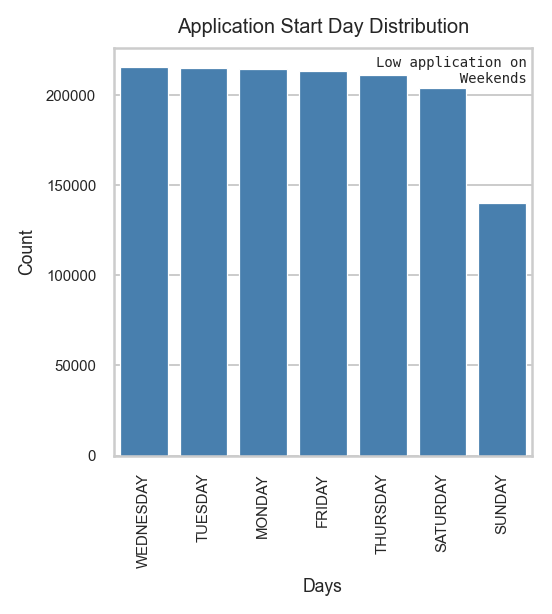

In [103]:
days_prev = app_prev_df["WEEKDAY_APPR_PROCESS_START_PREV"].value_counts()

fig = plt.figure(figsize=(3,3),dpi=180)
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=6)
   
papp_start = sns.barplot(x=days_prev.index,y=days_prev, color=blue)
papp_start.set_title('Application Start Day Distribution',fontsize=8)
papp_start.set_ylabel('Count',fontsize=7)
papp_start.set_xlabel('Days',fontsize=7)
plt.xticks(rotation = 90)

fig.text(0.61,0.785,
'''
Low application on 
          Weekends
''',fontfamily='monospace',fontsize=5.6)
plt.show()

- We can see on saturday & sunday, application no is less. Most prefered to fill on weekdays.
- But since there are applications on weekends, we can assume some people prefer to apply on weekends.

### Client Type Distribution

In [104]:
# Was the client old or new client when applying for the previous application
client_type = prev_df["NAME_CLIENT_TYPE"].value_counts()
df = pd.DataFrame({'labels': client_type.index,'values': client_type.values})
df.iplot(kind='pie',labels='labels',values='values',
         title='Was the client old or new client when applying for the previous application',
         colors=[orange,green,blue], dimensions=(650,500))

- We see majority of clients are Repeaters.

### Loan for

In [105]:
# Was the previous application for CASH, POS, CAR, CARDS
loan_for = prev_df["NAME_PORTFOLIO"].value_counts()
df = pd.DataFrame({'labels': loan_for.index,'values': loan_for.values})
df.iplot(kind='pie',labels='labels',values='values', 
         title='Was the previous application for CASH, POS, CAR, CARDS',
         colors=[orange,blue,red], dimensions=(650,500))

- Majority of previous application is for 'POS' and a good amount of it is for 'Cash'.

### Credit Amount

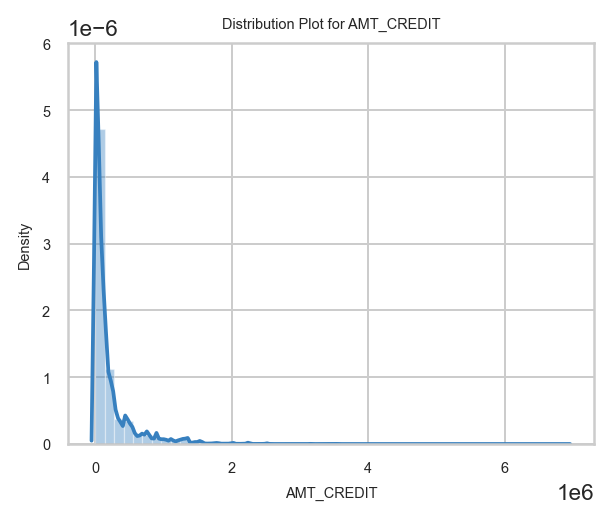

In [106]:
fig = plt.figure(figsize=(3.5,3),dpi=180,tight_layout=True)
plt.rc('xtick', labelsize=9)
plt.rc('ytick', labelsize=9)

plt.xticks(rotation=0,fontsize=5.8)
plt.yticks(fontsize=5.8)
plt.title("Distribution Plot for AMT_CREDIT",fontsize=5.8)
plt.xlabel('AMT_CREDIT',fontsize=5.8)
plt.ylabel('Density',fontsize=5.8)


sns.distplot(prev_df[~prev_df['AMT_CREDIT'].isna()]['AMT_CREDIT'], color=blue)


plt.show()

- We can see that distribution is not bell shaped, i.e not normally distributed. Further we can see many outliers in distribution.

### Analysis based on Contract Status

In [107]:
univar_bar(app_prev_df ,'NAME_CONTRACT_STATUS','Contract Status')

#### Inference
- 'Refused' contracts in previous applications are the ones having maximum percentage of Loan Payment difficulties in current application too.
- 'Approved' contracts in previous applications are the ones having minimum percentage of Loan Payment difficulties in current application.

### On Contract Type

In [108]:
univar_bar(app_prev_df, 'NAME_CONTRACT_TYPE', 'CONTRACT TYPE')

#### Inference

- Most people prefered loans in cash mode.
- Revolving loans type has max percentage of difficulties for loan repayment.
- consumer loans type has minimum percentage of difficulties for loan repayment.

### Distribution of Client Type

In [109]:
univar_bar(app_prev_df,'NAME_CLIENT_TYPE', 'Client Type')

New client in previous application mostly had loan repayment difficulties, while refreshed had least difficulties.

## Bi-variate Analysis

### Purpose of Loan & previous application status

- This analysis will help us understand the purpose of loan which are highly approved and also highly refused, based on previous loan applications data


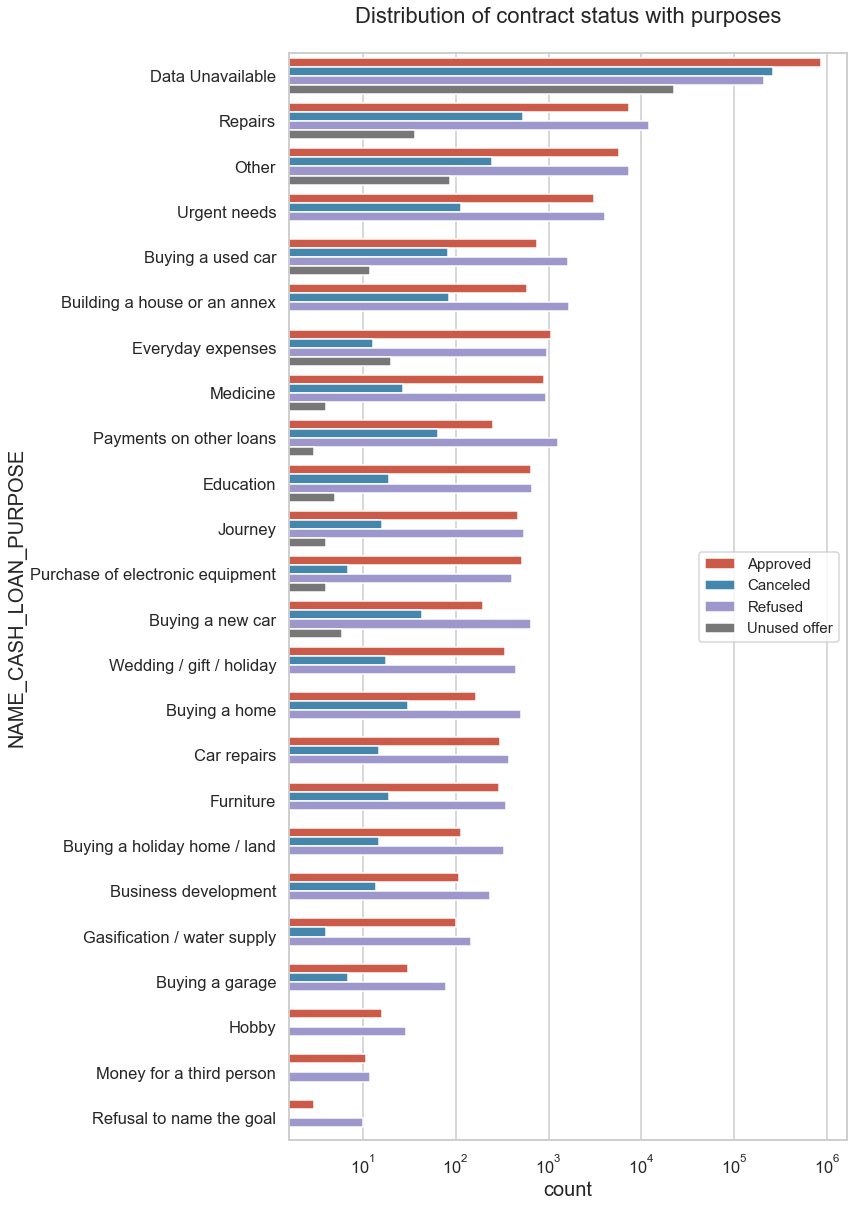

In [110]:
# Distribution of contract status by purpose of loan
#Call-out - We will ignore "Data Unavailable" category for generating insights (XPA/XNA values were replaced with the same)

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,20))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax = sns.countplot(data = app_prev_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=app_prev_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')
ax.legend(fontsize='small')
plt.show()

#### Observations: 
- Highest number of applications are refused by the company when purpose of loan is "Repairs", followed by "Other" and "Repayment of Other loan"
- Highest number of application are also approved for "Repairs" itself, but this number is still lesser than the applications refused
- Loan purposes like Education, Journey, Medicine, Purchase of Electronic Equipment are accepted more in comparison to others
- "Other" has the highest number of unused offers
- "Payments on Other Loans" & "Buying a new car" are categories with significantly higher rejections than approvals

### Analysing Purpose of Loan with Target Variable

- This will help us understand which loans are mostly observed to fave difficulty with payments. Based on this, the bank can be more careful and maybe perform more background check before sanctioning loan to those clients

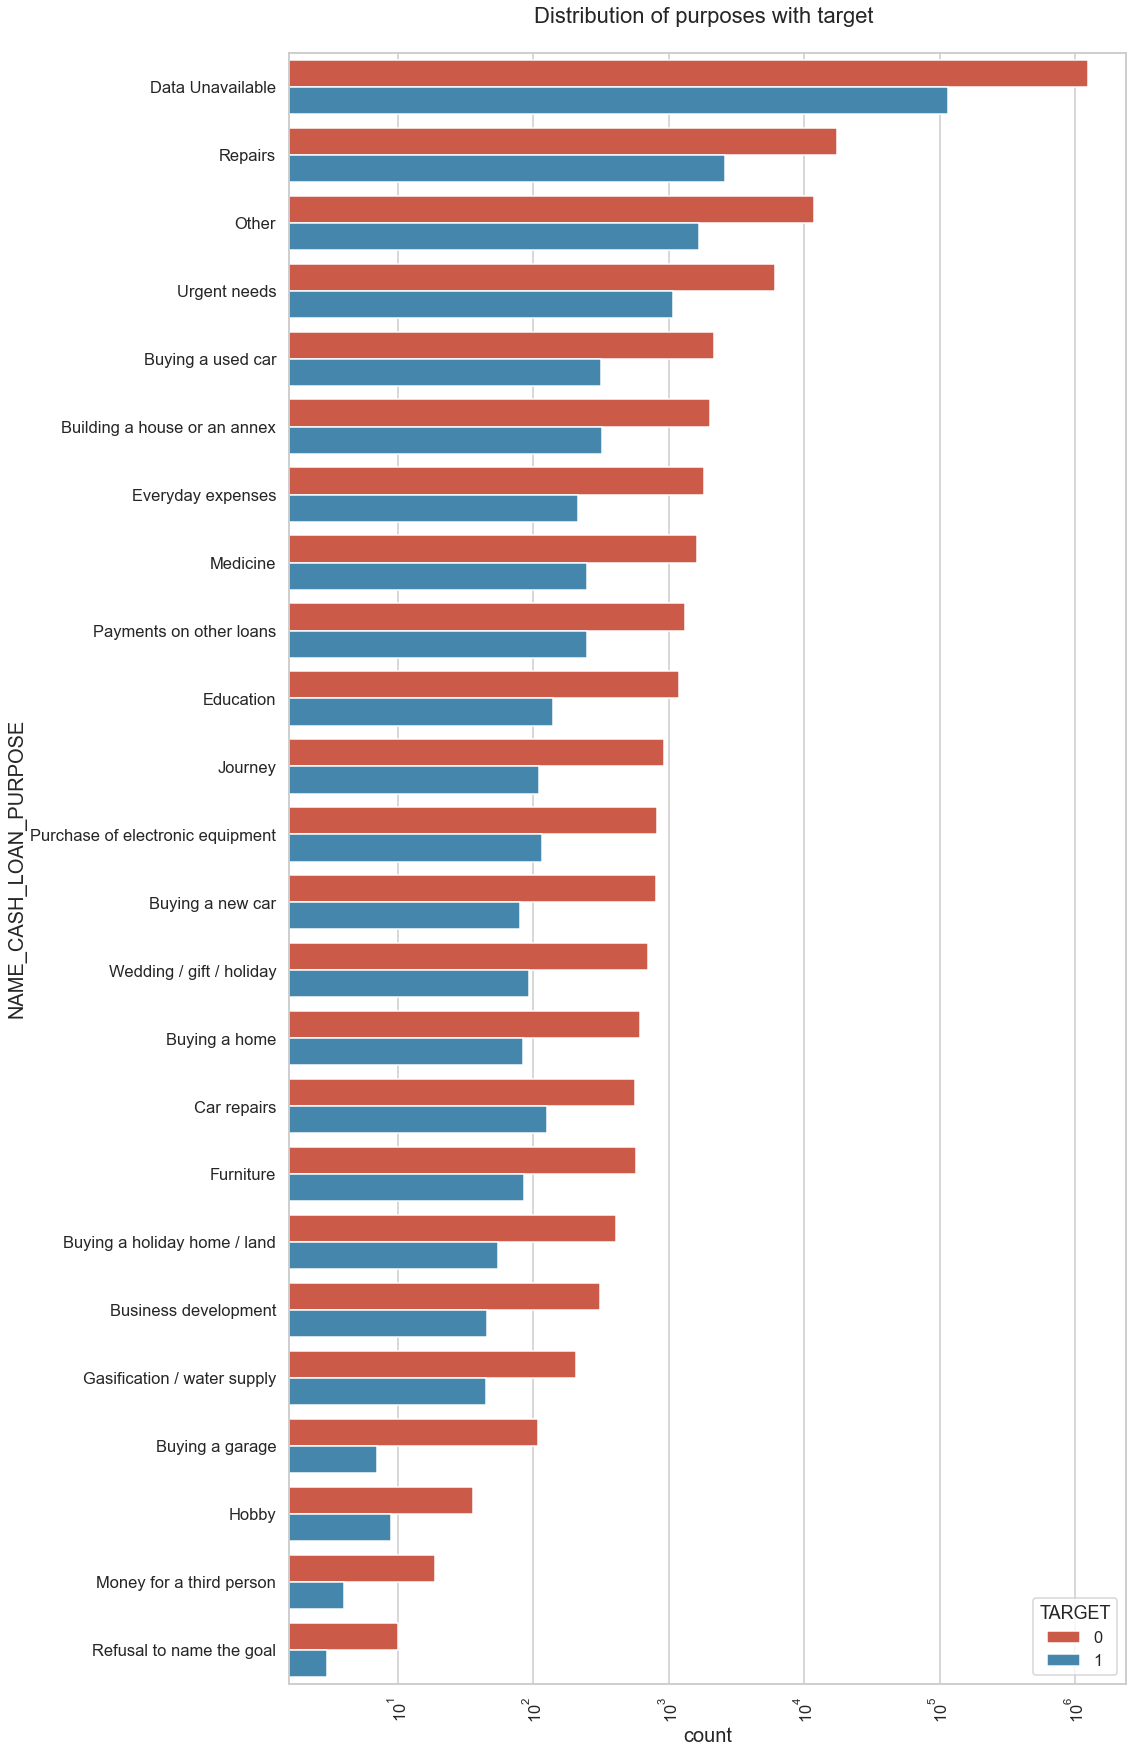

In [111]:
#Distribution of Loan Purpose by target variable 
#Call-out - We will ignore "Data Unavailable" category for generating insights (XPA/XNA values were replaced with the same)

sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams['axes.titlesize'] = 22
plt.rcParams['axes.titlepad'] = 30
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
ax = sns.countplot(data = app_prev_df, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=app_prev_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET')

#### Observations: 
- Loan purposes with `Repairs` are facing more difficulties in payment on time.
- There are few places where loan payment is significant higher than facing difficulties. They are `Buying a garage`, `Business development`, `Buying land`,`Buying a new car` and `Education` Hence we can focus on these purposes for which the client is having for minimal payment difficulties.

### Analysis on Credit amount & Loan purpose

In [112]:
# Modified Box Plot Function for Multi-variate analysis, horizontal
def mul_boxh(df,x,y,hue,xlabel,ylabel,title,logscale=False):
    fig = plt.figure(figsize=(12,26),dpi=180)
    
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    if logscale:
        plt.yscale('log')
    df_box = sns.boxplot(data =df, x=x,y=y, hue =hue,orient='h', 
               fliersize=2,linewidth=1)
    df_box.set_title(title)
    df_box.set_ylabel(ylabel,fontsize=14)
    df_box.set_xlabel(xlabel,fontsize=14)
    df_box.legend(fontsize='x-small')
    plt.show()

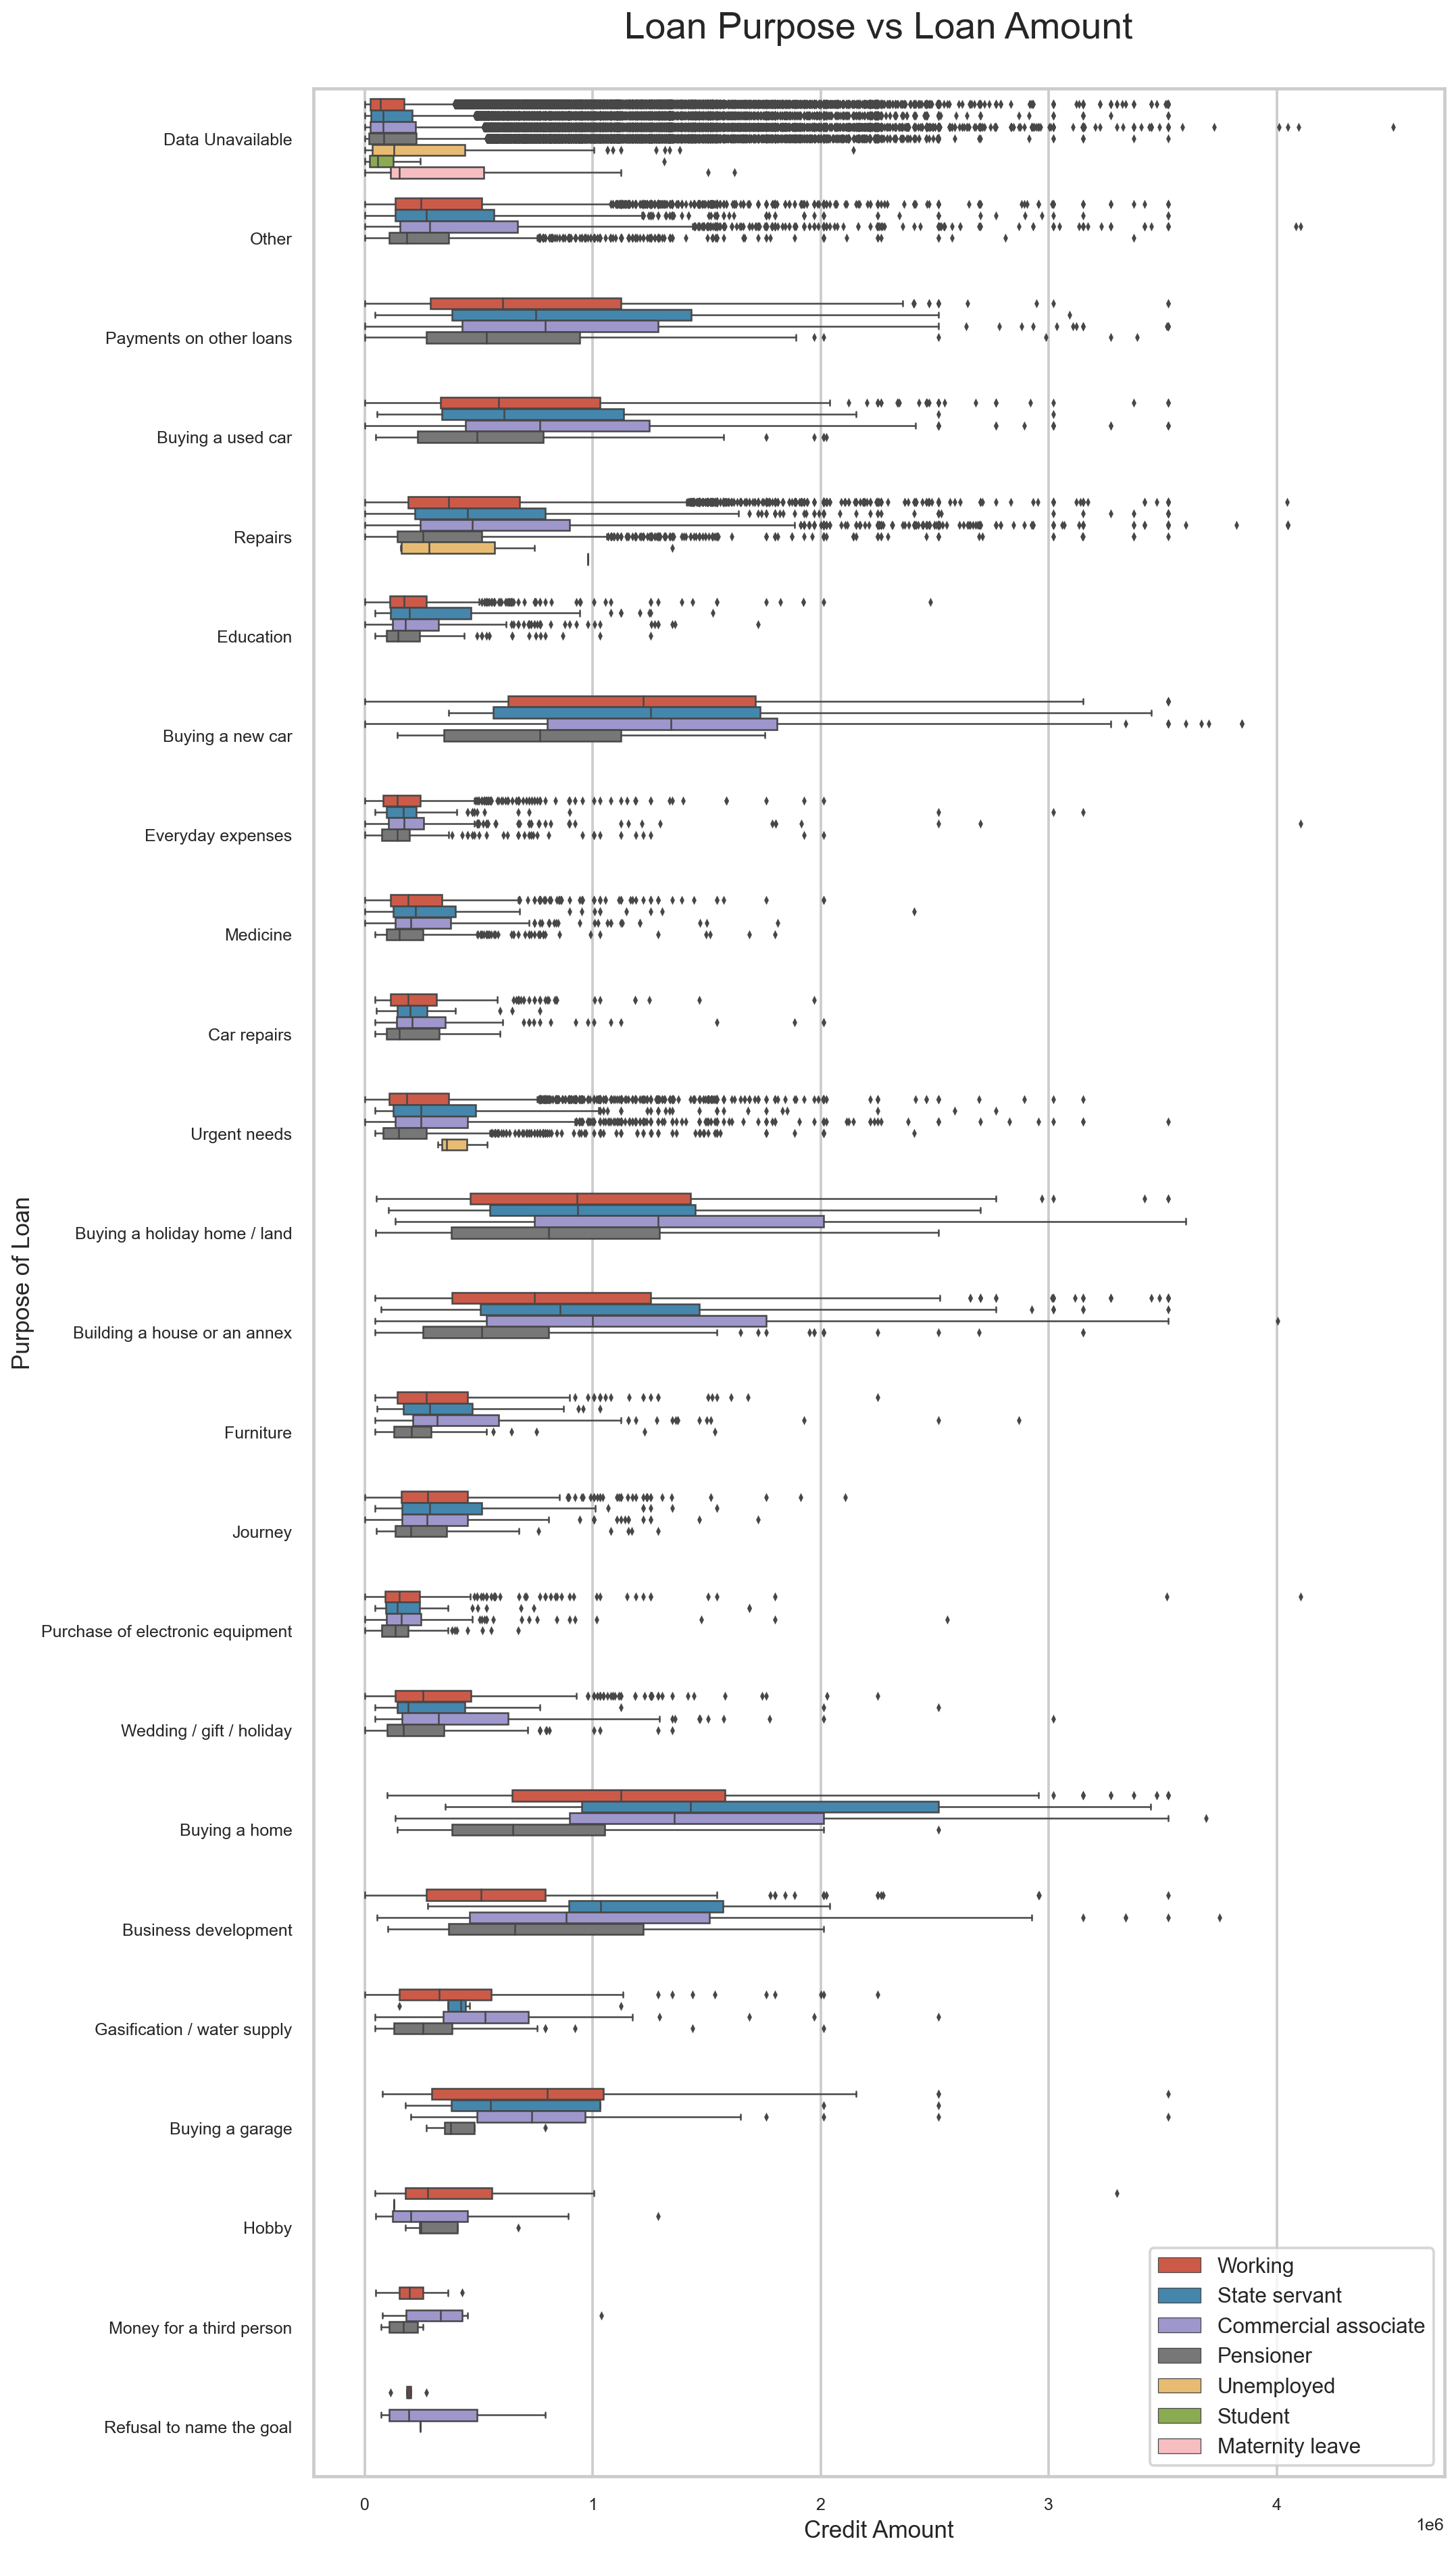

In [113]:
#Analysing Loan Purpose with Amount Credit from previous application, split across Income source type 
mul_boxh(app_prev_df,y='NAME_CASH_LOAN_PURPOSE',x='AMT_CREDIT_PREV',hue='NAME_INCOME_TYPE',
      title='Loan Purpose vs Loan Amount',
     ylabel='Purpose of Loan',xlabel='Credit Amount')

#### Observations:

- We can see that applications for purpose of `buying home`, `buying holiday home, land`, `buying new car` have higher credit amount in general. Since these loans are meant for specific purpose & can have mortgage in case of loan payment difficulties, we can promote this kind of loans since these are relatively safer.

### Analysis on Credit amount & Housing Type

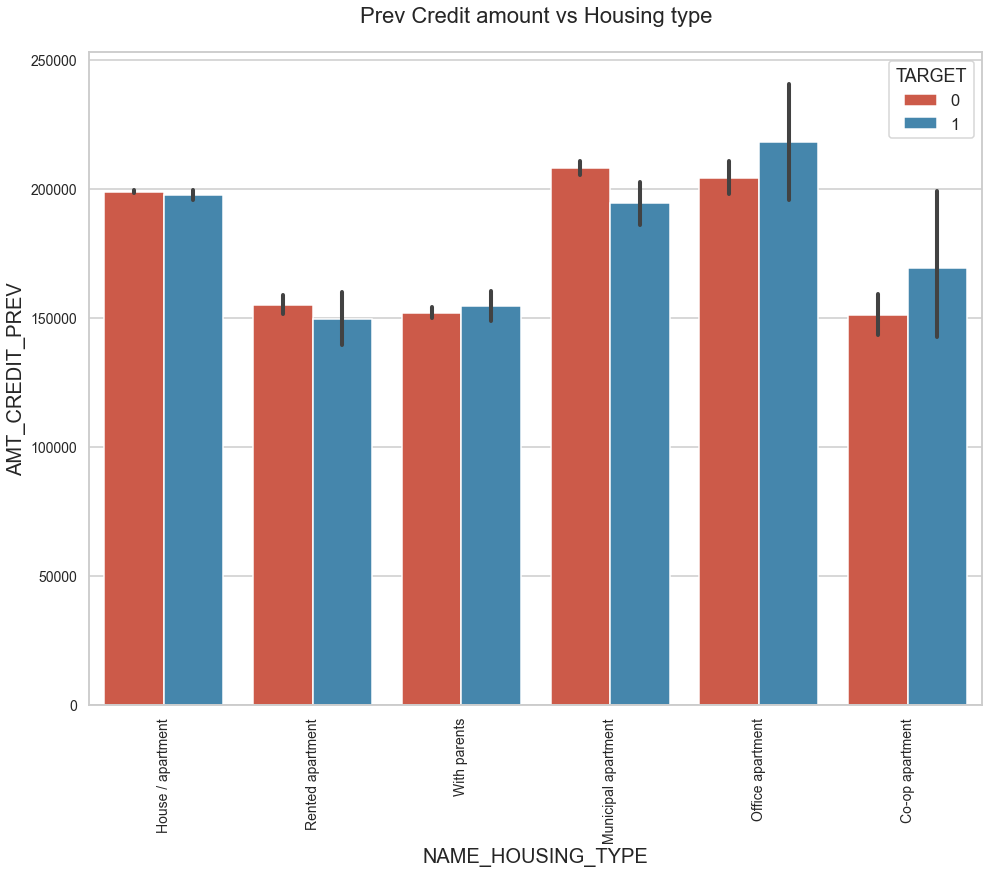

In [114]:
# Bar plotting for Credit amount vs Housing type, split by target Variable 

plt.figure(figsize=(16,12))
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
sns.barplot(data =app_prev_df, y='AMT_CREDIT_PREV',hue='TARGET',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

## Insights

### For Application Data

- There are no `Business` & `Student` category with `TARGET` column 1. We can assume occupation of these category pay on time & relatively safe to lend.

- People with `Low`,`VERY_Low` & `Medium` income group have higher loan application & higher percentage with loan repayment difficulties. While `High` & `Very_High` income group has low loan application and low percentage of payment difficulties. We can say these 2 income group is less likely to default. We can take some steps to promote loan for these 2 income group.

- The count of people with 'Lower Secondary' as ‘NAME_EDUCATION_TYPE’ is very less but it also has maximum percentage of payment difficulties(~11%). We should avoid people with `Lower Secondary` education to be on safer side.

- Though people in `Maternity Leave` constitute very less no. of clients(i.e 5), they have maximum percentage(40%) when it comes to loan repayment difficulties.

- Out of total application with `Unemployed` as Income type, 36% people had difficulties with payment. We can reduce these loan sanction.

- The count of people with 'Low Skilled Laborers' as `OCCUPATION_TYPE` is comparatively less. But it also have maximum percentage(~17%) when it comes to Payment difficulties.

### For Previous Application Data


- The count of people with `Refused` status in `NAME_CONTRACT_STATUS` column of previous data has maximum percentage for loan repayment difficulties. If any person has 'Refused' status in previous application, they tend to have payment difficulties even on new loan application & hence, those applications should have better counter measurement/screening to reduce loan payment default.

- The count of  `Revolving Loans` in `NAME_CONTRACT_TYPE` is comparatively less, but has maximum percentage(~10%) when it comes to loan repayment difficulties.

- We can see people have filled applications even on weekends. So there are certain group who prefer to do it on weekends. 

- People who had their application `Refused` in previous application, they tend to have payment difficulties. It can be used as 1st screening to determine if loan application should be accepted or not.

- People who were New in previous application also had max percentage of difficulties. New Clients should be thoroughly checked before sanctioning loan.

- Loans with purpose `Repairs Other  and Repayment of Other loan` had maximum refused count. We can reduce such loan sanction since they may have loan payment difficulties.

- `Buying a garage, Business development, Buying land,Buying a new car and Education` have significance difference in Loan repayment with difficulties & the one without loan repayment problem. So we can focus on application with these as loan purpose to increase profit.

- `Buying home`, `Buying holiday home/land`, `buying new car`, these type of loans have higher loan amount. Also since these are for specific purpose, we can have morgage for these. So these would be relatively safer choice for loan.